<div style="float:center;margin-left:190px;max-width:70%;">   
<img src="https://cdn.dribbble.com/users/1802972/screenshots/11312979/media/162068f31270338dfa8e09aa5aa32436.jpg?compress=1&resize=1200x900&vertical=top"></div>


<div class="inner_cell">
<div class="text_cell_render border-box-sizing rendered_html">
<p></p><div class="list-group" id="list-tab" role="tablist">
  <h3 class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home" style = "background-color:#30475E;font-family:Georgia;color:#FEFBE9;font-size:200%;text-align:LEFT;border-radius:20px 40px;overflow:hidden;border-style:dotted;border-width:1.8px;border-color:#FEFBE9;">...Table of Contents...</h3>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#1" role="tab" aria-controls="home" target="_self" style = "color:#000000; font-family:Charter;font-size:120%;">Libraries<span class="badge badge-primary badge-pill">1</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#2" role="tab" aria-controls="messages" target="_self" style = "color:#000000; font-family:Charter;font-size:120%;">Read & Understand<span class="badge badge-primary badge-pill">2</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#3" role="tab" aria-controls="settings" target="_self" style = "color:#000000; font-family:Charter;font-size:120%;">EDA<span class="badge badge-primary badge-pill">3</span></a>
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#4" role="tab" aria-controls="settings" target="_self" style = "color:#000000; font-family:Charter;font-size:120%;">Categories<span class="badge badge-primary badge-pill">4</span></a> 
  <a class="list-group-item list-group-item-action" data-toggle="list" href="#5" role="tab" aria-controls="settings" target="_self" style = "color:#000000; font-family:Charter;font-size:120%;">Numerics<span class="badge badge-primary badge-pill">5</span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#6" role="tab" aria-controls="settings" target="_self" style = "color:#000000; font-family:Charter;font-size:120%;">Corelation Matrix<span class="badge badge-primary badge-pill">6</span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#7" role="tab" aria-controls="settings" target="_self" style = "color:#000000; font-family:Charter;font-size:120%;">Outliers<span class="badge badge-primary badge-pill">7</span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#8" role="tab" aria-controls="settings" target="_self" style = "color:#000000; font-family:Charter;font-size:120%;">Missing<span class="badge badge-primary badge-pill">8</span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#9" role="tab" aria-controls="settings" target="_self" style = "color:#000000; font-family:Charter;font-size:120%;">Encoding & Scalling<span class="badge badge-primary badge-pill">9</span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="#10" role="tab" aria-controls="settings" target="_self" style = "color:#000000; font-family:Charter;font-size:120%;">Feature Ext.<span class="badge badge-primary badge-pill">10</span></a>
    <a class="list-group-item list-group-item-action" data-toggle="list" href="11" role="tab" aria-controls="settings" target="_self" style = "color:#000000; font-family:Charter;font-size:120%;">Model<span class="badge badge-primary badge-pill">11</span></a>
</div>
</div>
</div>


<p style= "background-color:#30475E;font-family:Georgia;color:#FEFBE9;font-size:145%;text-align:center;border-radius:20px 60px;overflow:hidden;border-style:dotted;border-width:1.8px;border-color:#FEFBE9;"><b>LIBRARIES</b></p>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime as dt
from collections import Counter

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import plotly.express as px

import warnings
from warnings import filterwarnings

from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV, cross_val_score, train_test_split
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.exceptions import DataConversionWarning


def mean_cross_val(model, X, y):
    score = cross_val_score(model, X, y, cv=5)
    mean = score.mean()
    return mean


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=DataConversionWarning)

<p style= "background-color:#30475E;font-family:Georgia;color:#FEFBE9;font-size:200%;text-align:center;border-radius:20px 60px;overflow:hidden;border-style:dotted;border-width:1.8px;border-color:#FEFBE9;"><b>READ & UNDERSTAND</b></p>

In [2]:
train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv", index_col=0)
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv", index_col=0)


print("train: ", train.shape)
print("test: ", test.shape)

ntrain = train.shape[0]
ntest = test.shape[0]
y = train[['SalePrice']]


df = pd.concat([train,test], axis=0)



train:  (1460, 80)
test:  (1459, 79)


In [3]:
def check_df(dataframe, head=5):
    print(" SHAPE ".center(90,'~'))
    print('Rows: {}'.format(dataframe.shape[0]))
    print('Columns: {}'.format(dataframe.shape[1]))
    print(" TYPES ".center(90,'~'))
    print(dataframe.dtypes)
    print(" MISSING VALUES ".center(90,'~'))
    print(dataframe.isnull().sum())
    print(" DUPLICATED VALUES ".center(90,'~'))
    print(dataframe.duplicated().sum())
    print(" DESCRIBE ".center(90,'~'))
    print(dataframe.describe().T)
    
check_df(df)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ SHAPE ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Rows: 2919
Columns: 80
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ TYPES ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      ob

In [4]:
df.columns = [col.upper() for col in df.columns]
df.head()

MSSUBCLASS MSZONING  LOTFRONTAGE  LOTAREA STREET ALLEY LOTSHAPE LANDCONTOUR UTILITIES LOTCONFIG LANDSLOPE NEIGHBORHOOD CONDITION1 CONDITION2 BLDGTYPE HOUSESTYLE  OVERALLQUAL  OVERALLCOND  YEARBUILT  YEARREMODADD ROOFSTYLE ROOFMATL EXTERIOR1ST EXTERIOR2ND MASVNRTYPE  MASVNRAREA EXTERQUAL EXTERCOND FOUNDATION BSMTQUAL BSMTCOND BSMTEXPOSURE BSMTFINTYPE1  BSMTFINSF1 BSMTFINTYPE2  BSMTFINSF2  BSMTUNFSF  TOTALBSMTSF HEATING HEATINGQC CENTRALAIR ELECTRICAL  1STFLRSF  2NDFLRSF  LOWQUALFINSF  \
Id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
1           60       RL       65.000     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace     196.000        Gd        TA      PConc       Gd       TA           No          GLQ     706.000          Unf       0.000    150.000      856.000    GasA        Ex          Y      SBrkr       856       854             0   
2           20       RL       80.000     9600   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd       None       0.000        TA        TA     CBlock       Gd       TA           Gd          ALQ     978.000          Unf       0.000    284.000     1262.000    GasA        Ex          Y      SBrkr      1262         0             0   
3           60       RL       68.000    11250   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace     162.000        Gd        TA      PConc       Gd       TA           Mn          GLQ     486.000          Unf       0.000    434.000      920.000    GasA        Ex          Y      SBrkr       920       866             0   
4           70       RL       60.000     9550   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng       None       0.000        TA        TA     BrkTil       TA       Gd           No          ALQ     216.000          Unf       0.000    540.000      756.000    GasA        Gd          Y      SBrkr       961       756             0   
5           60       RL       84.000    14260   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story            8            5       2000          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace     350.000        Gd        TA      PConc       Gd       TA           Av          GLQ     655.000          Unf       0.000    490.000     1145.000    GasA        Ex          Y      SBrkr      1145      1053             0   

    GRLIVAREA  BSMTFULLBATH  BSMTHALFBATH  FULLBATH  HALFBATH  BEDROOMABVGR  KITCHENABVGR KITCHENQUAL  TOTRMSABVGRD FUNCTIONAL  FIREPLACES FIREPLACEQU GARAGETYPE  GARAGEYRBLT GARAGEFINISH  GARAGECARS  GARAGEAREA GARAGEQUAL GARAGECOND PAVEDDRIVE  WOODDECKSF  OPENPORCHSF  ENCLOSEDPORCH  3SSNPORCH  SCREENPORCH  POOLAREA POOLQC FENCE MISCFEATURE  MISCVAL  MOSOLD  YRSOLD SALETYPE SALECONDITION  SALEPRICE  
Id                                                                                                                                   

<p style= "background-color:#30475E;font-family:Georgia;color:#FEFBE9;font-size:200%;text-align:center;border-radius:20px 60px;overflow:hidden;border-style:dotted;border-width:1.8px;border-color:#FEFBE9;"><b>EDA</b></p>

In [5]:
num_cols_gen = df.select_dtypes(exclude=['object']).drop(['MSSUBCLASS'], axis=1).copy()

cat_cols = df.select_dtypes(include=['object']).copy()
cat_cols['MSSUBCLASS'] = df['MSSUBCLASS']   #MSSubClass is nominal

print(" num_cols_gen ".center(150,'~'))
print(num_cols_gen.columns)

print(" cat_cols ".center(150,'~'))
print(cat_cols.columns)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ num_cols_gen ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Index(['LOTFRONTAGE', 'LOTAREA', 'OVERALLQUAL', 'OVERALLCOND', 'YEARBUILT', 'YEARREMODADD', 'MASVNRAREA', 'BSMTFINSF1', 'BSMTFINSF2', 'BSMTUNFSF', 'TOTALBSMTSF', '1STFLRSF', '2NDFLRSF', 'LOWQUALFINSF', 'GRLIVAREA', 'BSMTFULLBATH', 'BSMTHALFBATH', 'FULLBATH', 'HALFBATH', 'BEDROOMABVGR', 'KITCHENABVGR', 'TOTRMSABVGRD', 'FIREPLACES', 'GARAGEYRBLT', 'GARAGECARS', 'GARAGEAREA', 'WOODDECKSF', 'OPENPORCHSF', 'ENCLOSEDPORCH', '3SSNPORCH', 'SCREENPORCH', 'POOLAREA', 'MISCVAL', 'MOSOLD', 'YRSOLD',
       'SALEPRICE'],
      dtype='object')
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ cat_cols ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Index(['MSZONING', 'STREET', 'ALLEY', 'LOTSHAPE', 'LANDCONTOUR', 'UTILITIES', 'LOTCONFIG', 'LANDSLOPE', 'NEIGHBORHOOD', 'CONDITION1', 'CONDITION2', 'BLDGTYPE', 'H

In [6]:
num_but_cat = ['OVERALLQUAL','OVERALLCOND','BSMTFULLBATH','BSMTHALFBATH','FULLBATH','HALFBATH',
                'BEDROOMABVGR', 'KITCHENABVGR', 'TOTRMSABVGRD', 'FIREPLACES', 'GARAGECARS', 'MOSOLD', 'YRSOLD']

num_cols = []
for i in num_cols_gen.columns:
    if i not in num_but_cat:
        num_cols.append(i)
        
print(" num_but_cat ".center(150,'~'))
print(num_but_cat)

print(" num_cols ".center(150,'~'))
print(num_cols)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ num_but_cat ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
['OVERALLQUAL', 'OVERALLCOND', 'BSMTFULLBATH', 'BSMTHALFBATH', 'FULLBATH', 'HALFBATH', 'BEDROOMABVGR', 'KITCHENABVGR', 'TOTRMSABVGRD', 'FIREPLACES', 'GARAGECARS', 'MOSOLD', 'YRSOLD']
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ num_cols ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
['LOTFRONTAGE', 'LOTAREA', 'YEARBUILT', 'YEARREMODADD', 'MASVNRAREA', 'BSMTFINSF1', 'BSMTFINSF2', 'BSMTUNFSF', 'TOTALBSMTSF', '1STFLRSF', '2NDFLRSF', 'LOWQUALFINSF', 'GRLIVAREA', 'GARAGEYRBLT', 'GARAGEAREA', 'WOODDECKSF', 'OPENPORCHSF', 'ENCLOSEDPORCH', '3SSNPORCH', 'SCREENPORCH', 'POOLAREA', 'MISCVAL', 'SALEPRICE']


<p style= "background-color:#30475E;font-family:Georgia;color:#FEFBE9;font-size:200%;text-align:center;border-radius:20px 60px;overflow:hidden;border-style:dotted;border-width:1.8px;border-color:#FEFBE9;"><b>CATECORIC FEATURES</b></p>

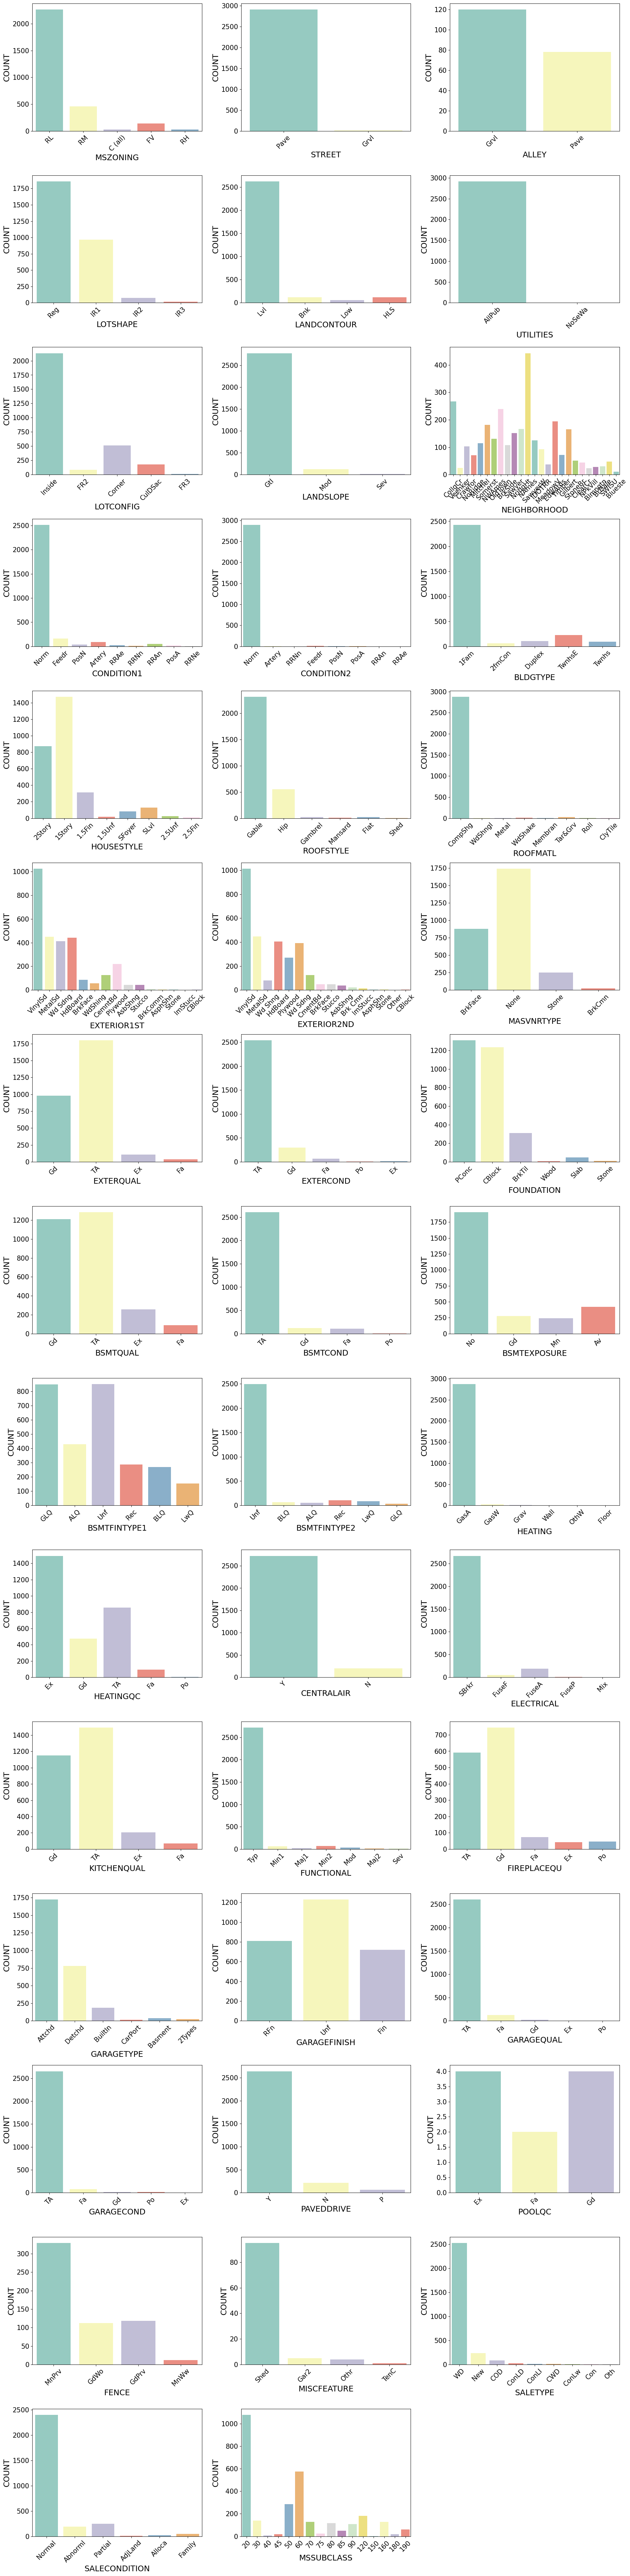

In [7]:
sns.color_palette("pastel")

fig = plt.figure(figsize=(20,140))
for index,col in enumerate(cat_cols.columns):
    plt.subplot(26,3,index+1)
    sns.countplot(x=cat_cols.iloc[:,index], data=cat_cols.dropna(), palette='Set3')
    plt.ylabel('COUNT', size = 18,color="black" )
    plt.xlabel(col, fontsize = 18,color="black" )

    plt.xticks(size = 15,color="black", rotation = 45 )
    plt.yticks(size = 15,color="black" )
    
fig.tight_layout(pad=1.0)


<p style= "background-color:#30475E;font-family:Georgia;color:#FEFBE9;font-size:200%;text-align:center;border-radius:20px 60px;overflow:hidden;border-style:dotted;border-width:1.8px;border-color:#FEFBE9;"><b>num_but_cat</b></p>

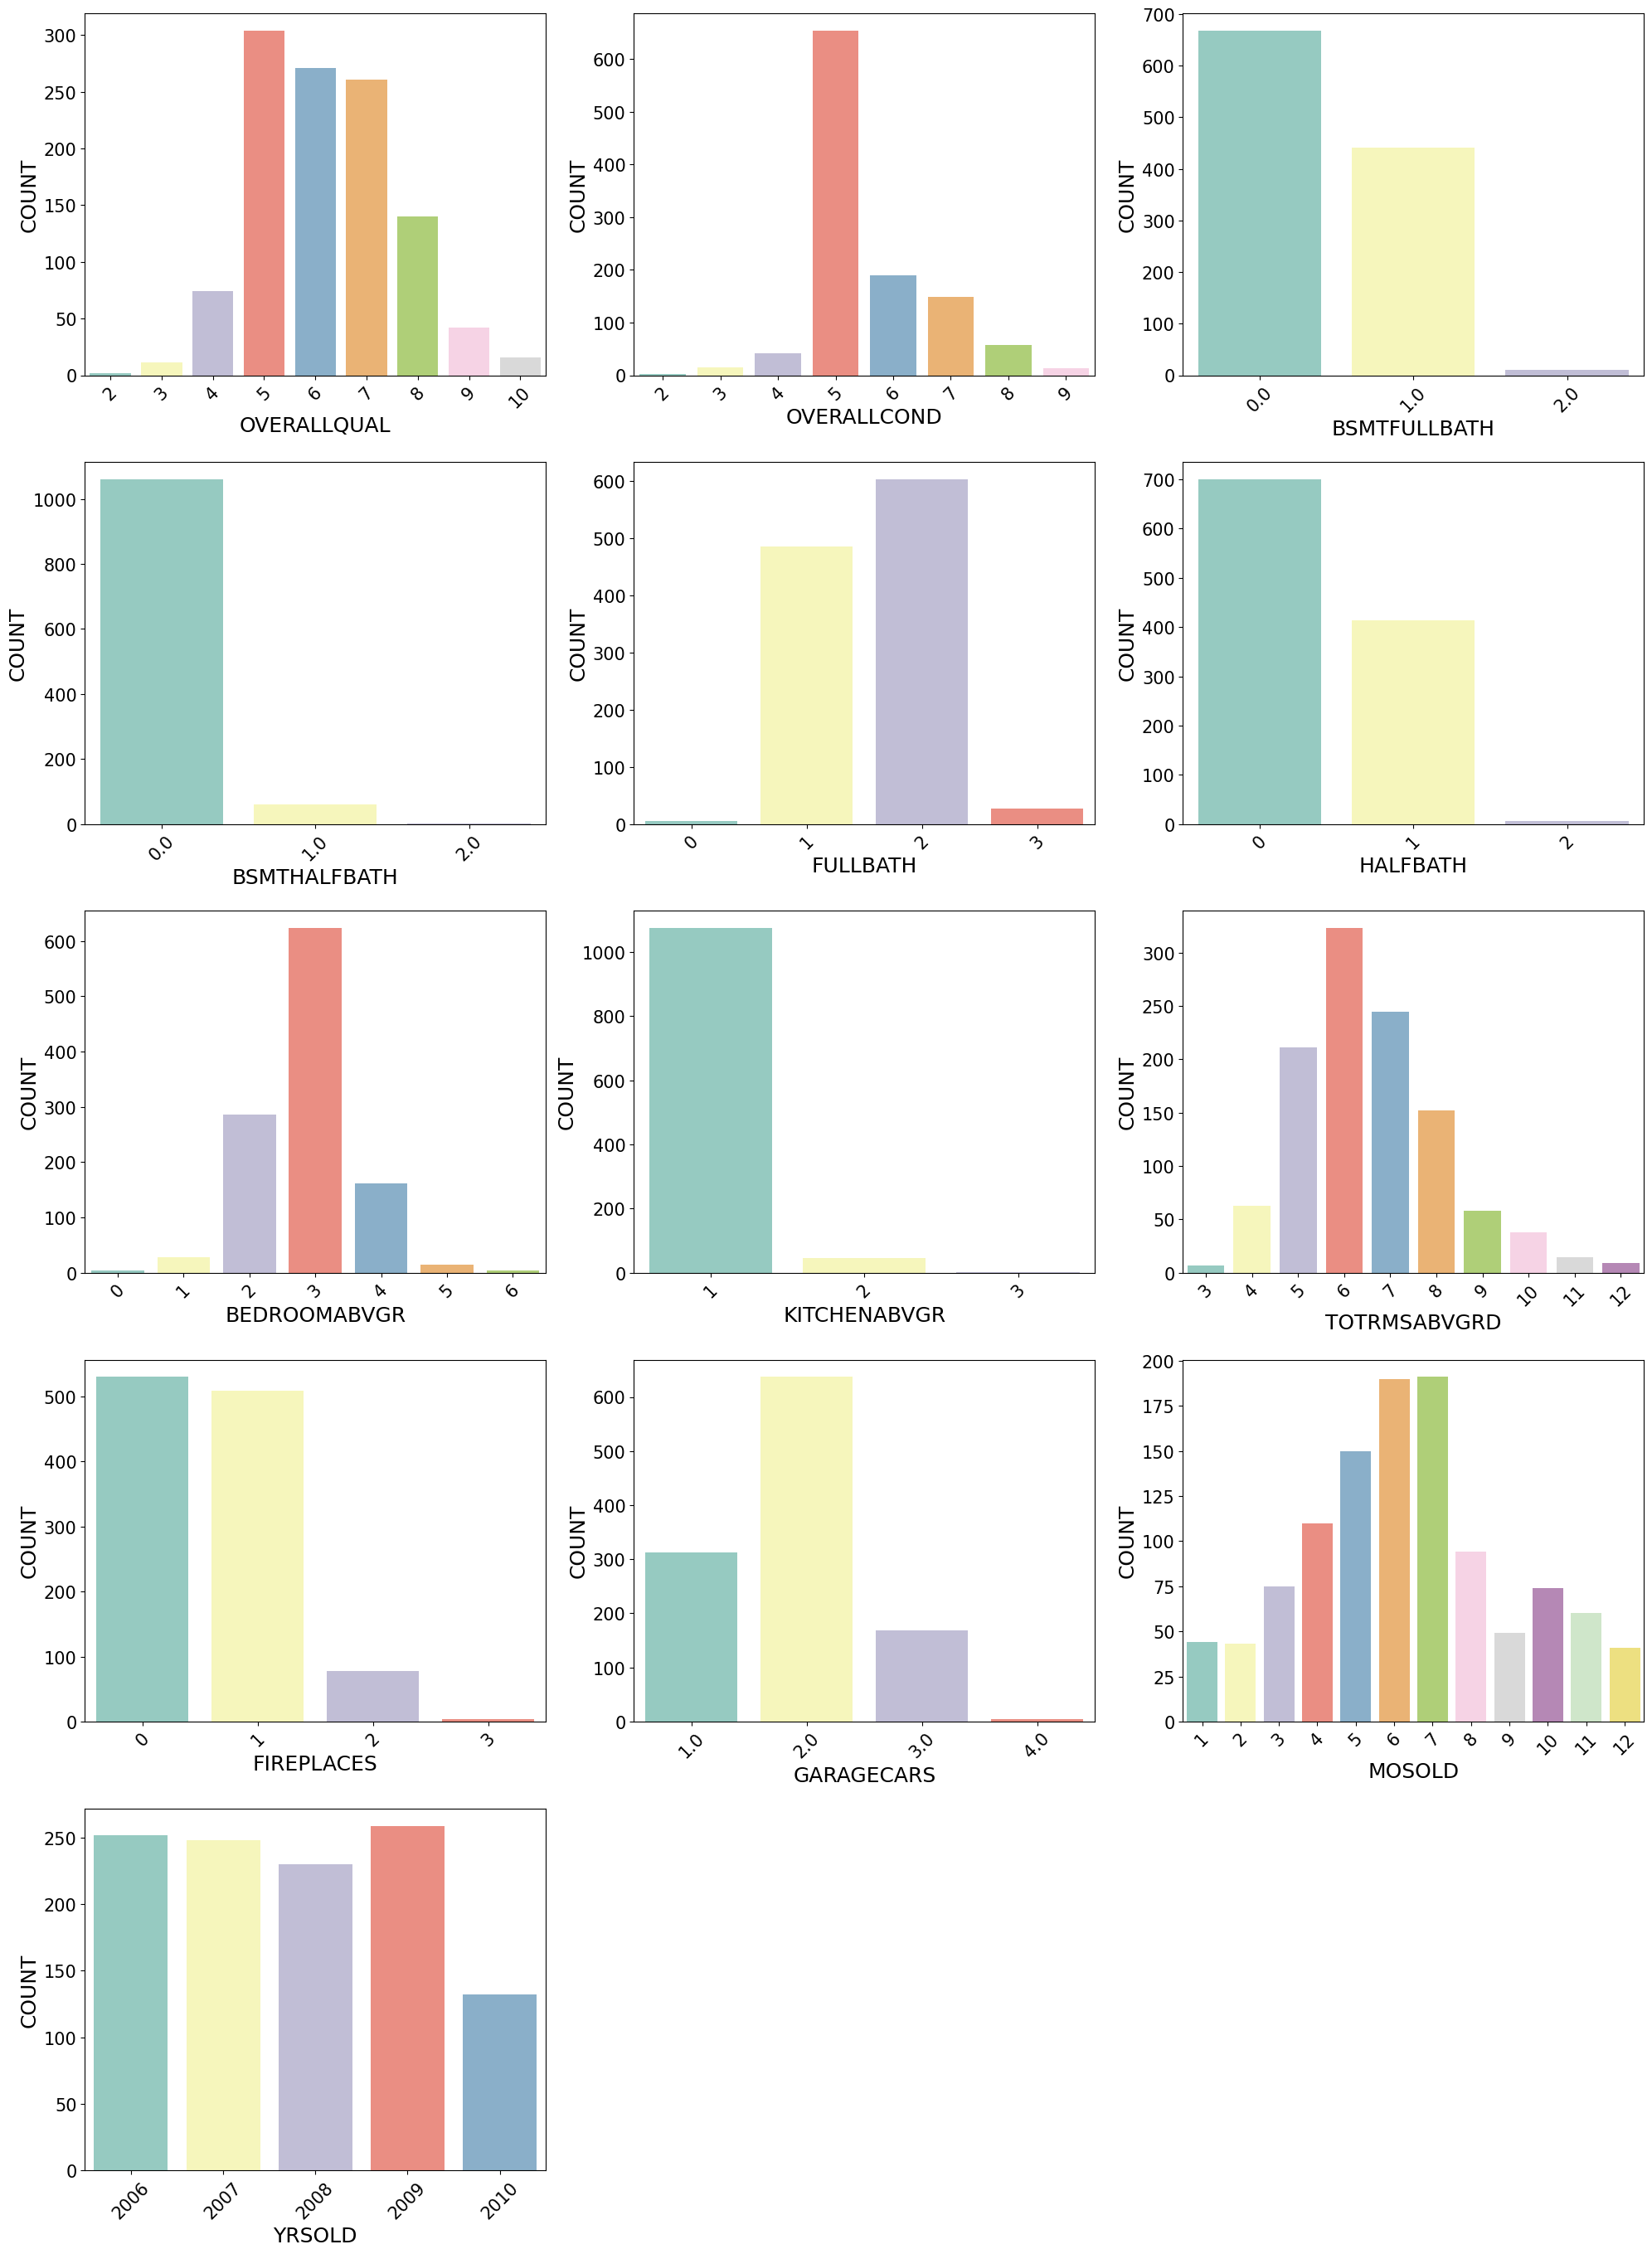

In [8]:
sns.color_palette("pastel")

fig = plt.figure(figsize=(20,140))
for index,col in enumerate(num_but_cat):
    plt.subplot(26,3,index+1)
    sns.countplot(x=col, data=num_cols_gen.dropna(), palette='Set3')
    plt.ylabel('COUNT', size = 18,color="black" )
    plt.xlabel(col, fontsize = 18,color="black" )
    plt.xticks(size = 15,color="black", rotation = 45 )
    plt.yticks(size = 15,color="black" )
    
fig.tight_layout(pad=1.0)




<p style= "background-color:#30475E;font-family:Georgia;color:#FEFBE9;font-size:200%;text-align:center;border-radius:20px 60px;overflow:hidden;border-style:dotted;border-width:1.8px;border-color:#FEFBE9;"><b>NUMERIC FEATURES</b></p>

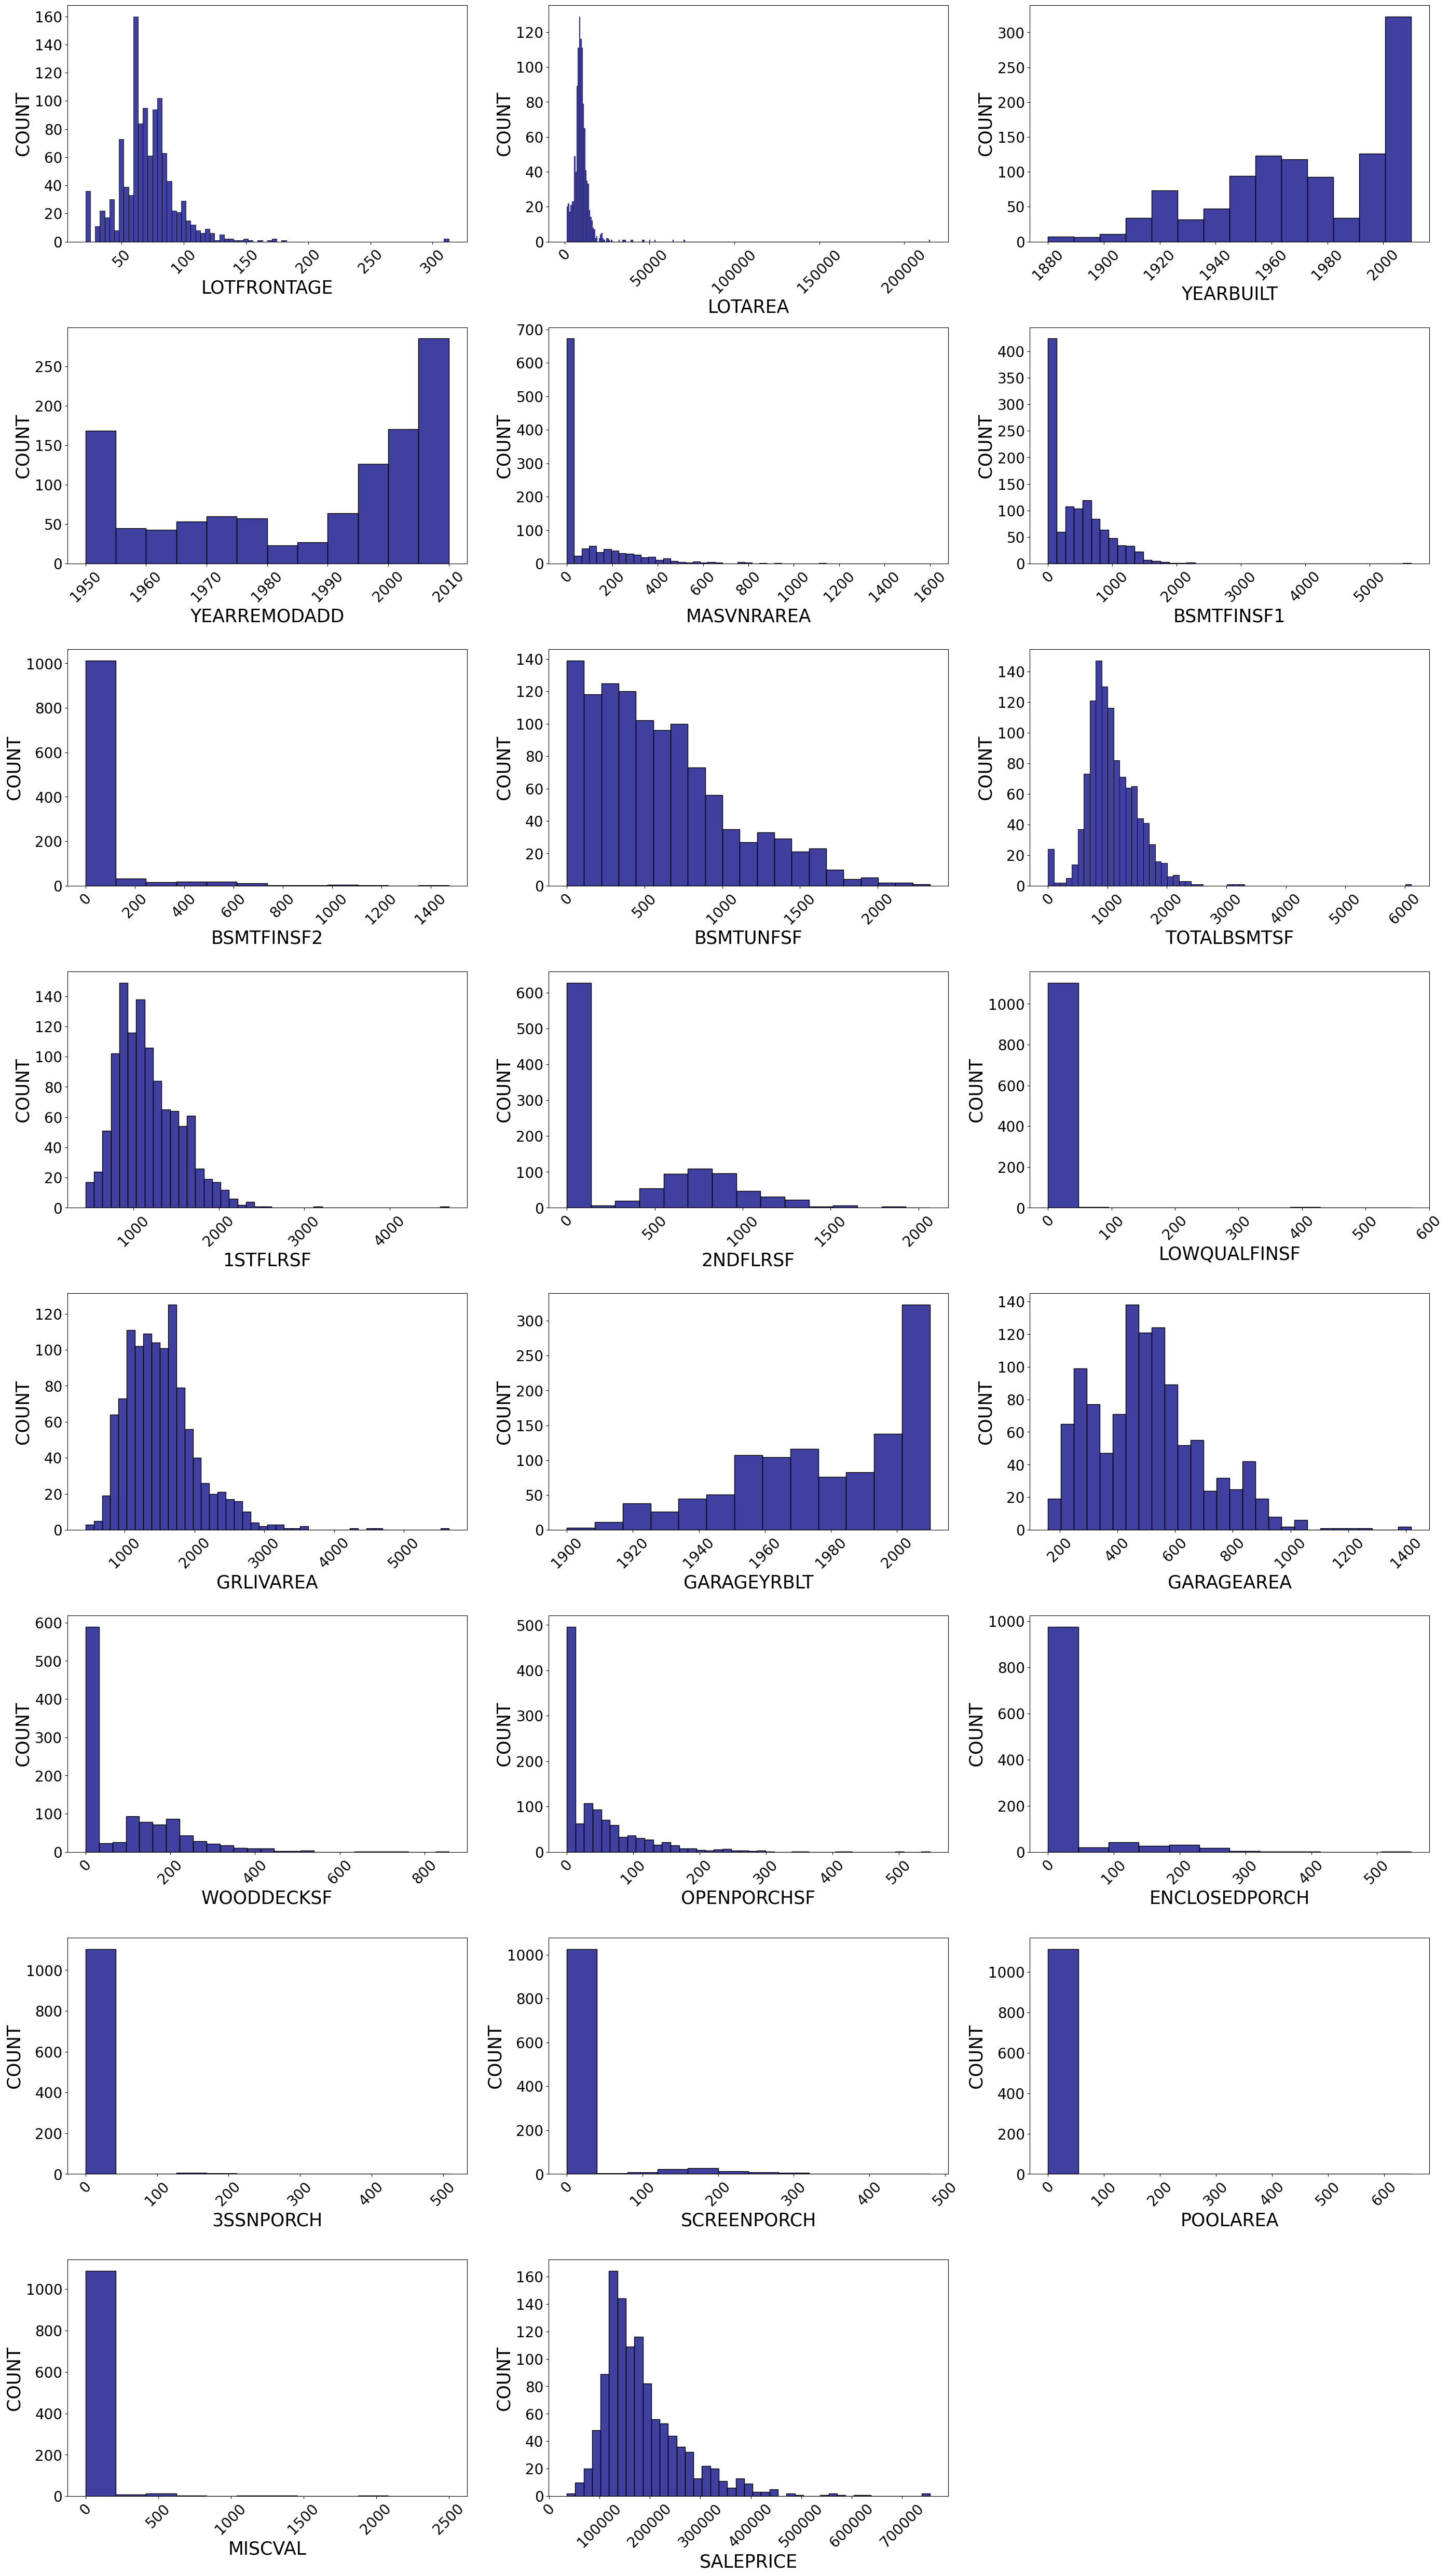

In [9]:
fig = plt.figure(figsize=(28,160))
for index,col in enumerate(num_cols):
    plt.subplot(26,3,index+1)
    sns.histplot(x=col, data=num_cols_gen.dropna(), color='navy')
    plt.ylabel('COUNT', size = 25,color="black" )
    plt.xlabel(col, fontsize = 25,color="black" )
    plt.xticks(size = 20,color="black", rotation = 45 )
    plt.yticks(size = 20,color="black" )
    
fig.tight_layout(pad=1.0)


<p style= "background-color:#30475E;font-family:Georgia;color:#FEFBE9;font-size:200%;text-align:center;border-radius:20px 60px;overflow:hidden;border-style:dotted;border-width:1.8px;border-color:#FEFBE9;"><b>Correlation Matrix</b></p>

In [10]:
df.head()

MSSUBCLASS MSZONING  LOTFRONTAGE  LOTAREA STREET ALLEY LOTSHAPE LANDCONTOUR UTILITIES LOTCONFIG LANDSLOPE NEIGHBORHOOD CONDITION1 CONDITION2 BLDGTYPE HOUSESTYLE  OVERALLQUAL  OVERALLCOND  YEARBUILT  YEARREMODADD ROOFSTYLE ROOFMATL EXTERIOR1ST EXTERIOR2ND MASVNRTYPE  MASVNRAREA EXTERQUAL EXTERCOND FOUNDATION BSMTQUAL BSMTCOND BSMTEXPOSURE BSMTFINTYPE1  BSMTFINSF1 BSMTFINTYPE2  BSMTFINSF2  BSMTUNFSF  TOTALBSMTSF HEATING HEATINGQC CENTRALAIR ELECTRICAL  1STFLRSF  2NDFLRSF  LOWQUALFINSF  \
Id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
1           60       RL       65.000     8450   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2003          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace     196.000        Gd        TA      PConc       Gd       TA           No          GLQ     706.000          Unf       0.000    150.000      856.000    GasA        Ex          Y      SBrkr       856       854             0   
2           20       RL       80.000     9600   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story            6            8       1976          1976     Gable  CompShg     MetalSd     MetalSd       None       0.000        TA        TA     CBlock       Gd       TA           Gd          ALQ     978.000          Unf       0.000    284.000     1262.000    GasA        Ex          Y      SBrkr      1262         0             0   
3           60       RL       68.000    11250   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story            7            5       2001          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace     162.000        Gd        TA      PConc       Gd       TA           Mn          GLQ     486.000          Unf       0.000    434.000      920.000    GasA        Ex          Y      SBrkr       920       866             0   
4           70       RL       60.000     9550   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam     2Story            7            5       1915          1970     Gable  CompShg     Wd Sdng     Wd Shng       None       0.000        TA        TA     BrkTil       TA       Gd           No          ALQ     216.000          Unf       0.000    540.000      756.000    GasA        Gd          Y      SBrkr       961       756             0   
5           60       RL       84.000    14260   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam     2Story            8            5       2000          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace     350.000        Gd        TA      PConc       Gd       TA           Av          GLQ     655.000          Unf       0.000    490.000     1145.000    GasA        Ex          Y      SBrkr      1145      1053             0   

    GRLIVAREA  BSMTFULLBATH  BSMTHALFBATH  FULLBATH  HALFBATH  BEDROOMABVGR  KITCHENABVGR KITCHENQUAL  TOTRMSABVGRD FUNCTIONAL  FIREPLACES FIREPLACEQU GARAGETYPE  GARAGEYRBLT GARAGEFINISH  GARAGECARS  GARAGEAREA GARAGEQUAL GARAGECOND PAVEDDRIVE  WOODDECKSF  OPENPORCHSF  ENCLOSEDPORCH  3SSNPORCH  SCREENPORCH  POOLAREA POOLQC FENCE MISCFEATURE  MISCVAL  MOSOLD  YRSOLD SALETYPE SALECONDITION  SALEPRICE  
Id                                                                                                                                   

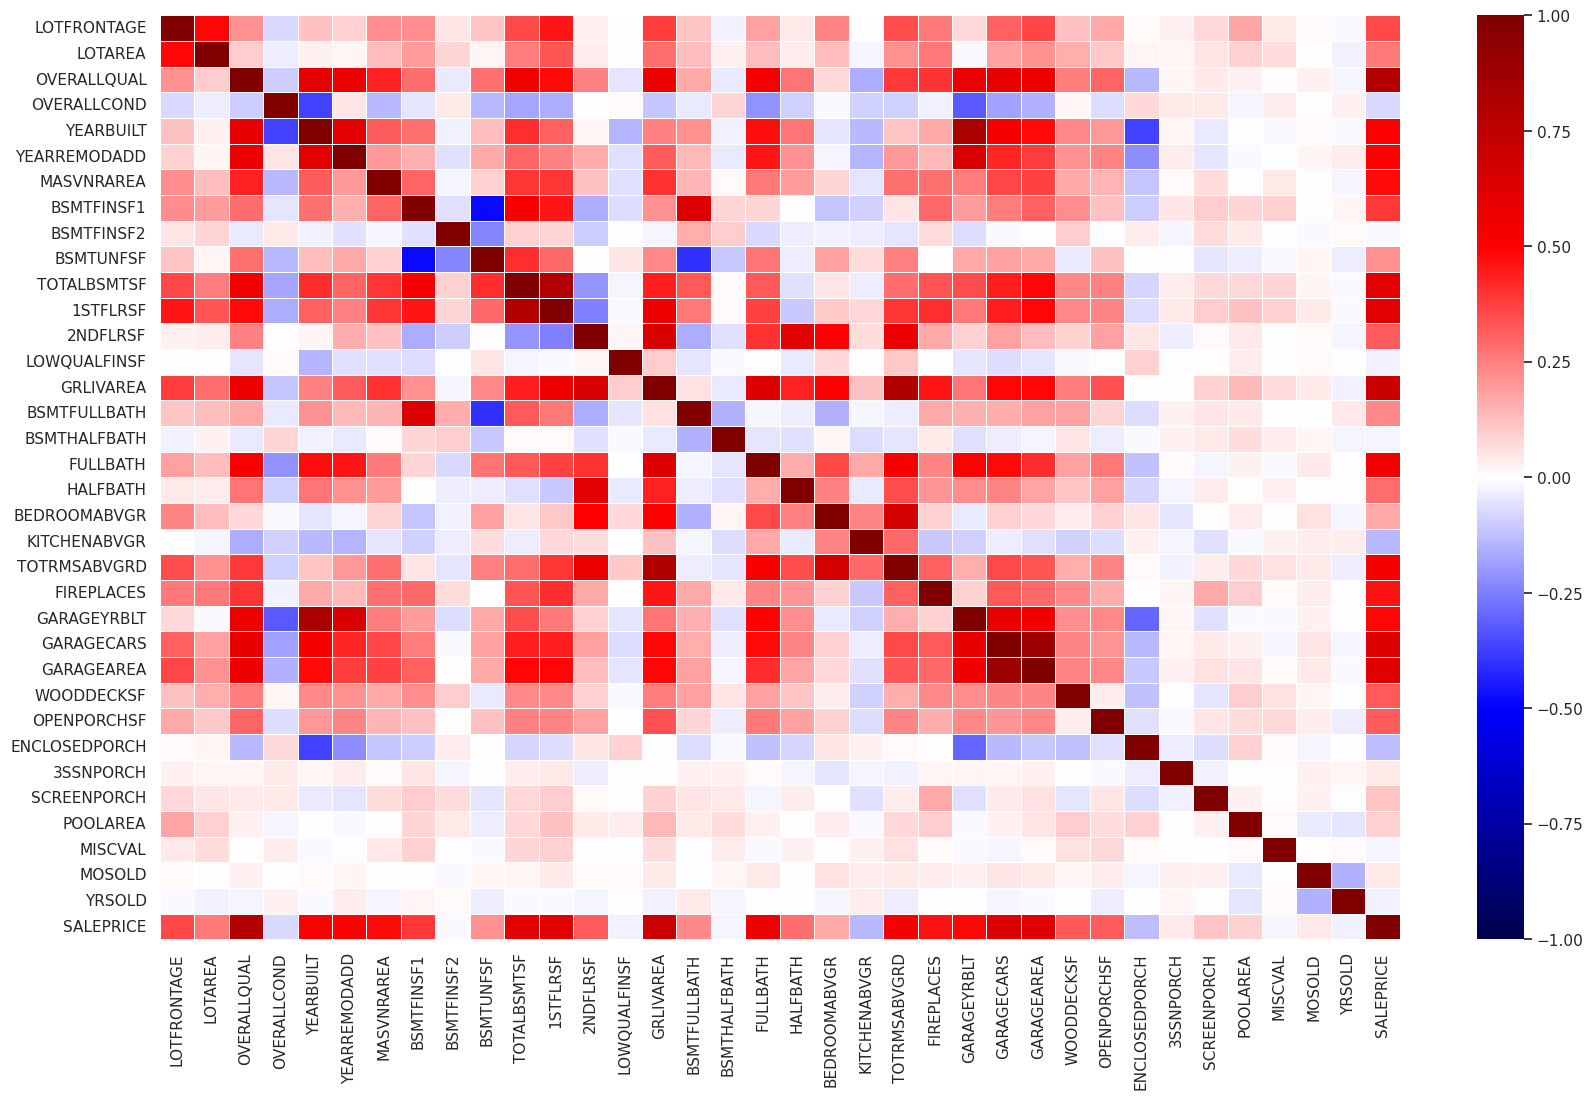

(2919, 80)

In [11]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.75):
    corr = dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool_))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        sns.set(rc={'figure.figsize': (20, 12)})
        sns.heatmap(corr, linewidth=0.5, cmap="seismic", vmin=-1, vmax=1, fmt='.1f')
        plt.show(block=True)
        return drop_list
    print(drop_list)

drop_list = high_correlated_cols(num_cols_gen, plot=True)

df.shape

In [12]:
drop_list = [col for col in drop_list if col != 'SALEPRICE']
drop_list

['1STFLRSF', 'TOTRMSABVGRD', 'GARAGEYRBLT', 'GARAGEAREA']

In [13]:
df.drop(drop_list, axis=1, inplace=True)
df.shape

(2919, 76)

<p style= "background-color:#30475E;font-family:Georgia;color:#FEFBE9;font-size:200%;text-align:center;border-radius:20px 60px;overflow:hidden;border-style:dotted;border-width:1.8px;border-color:#FEFBE9;"><b>SCATTER</b></p>

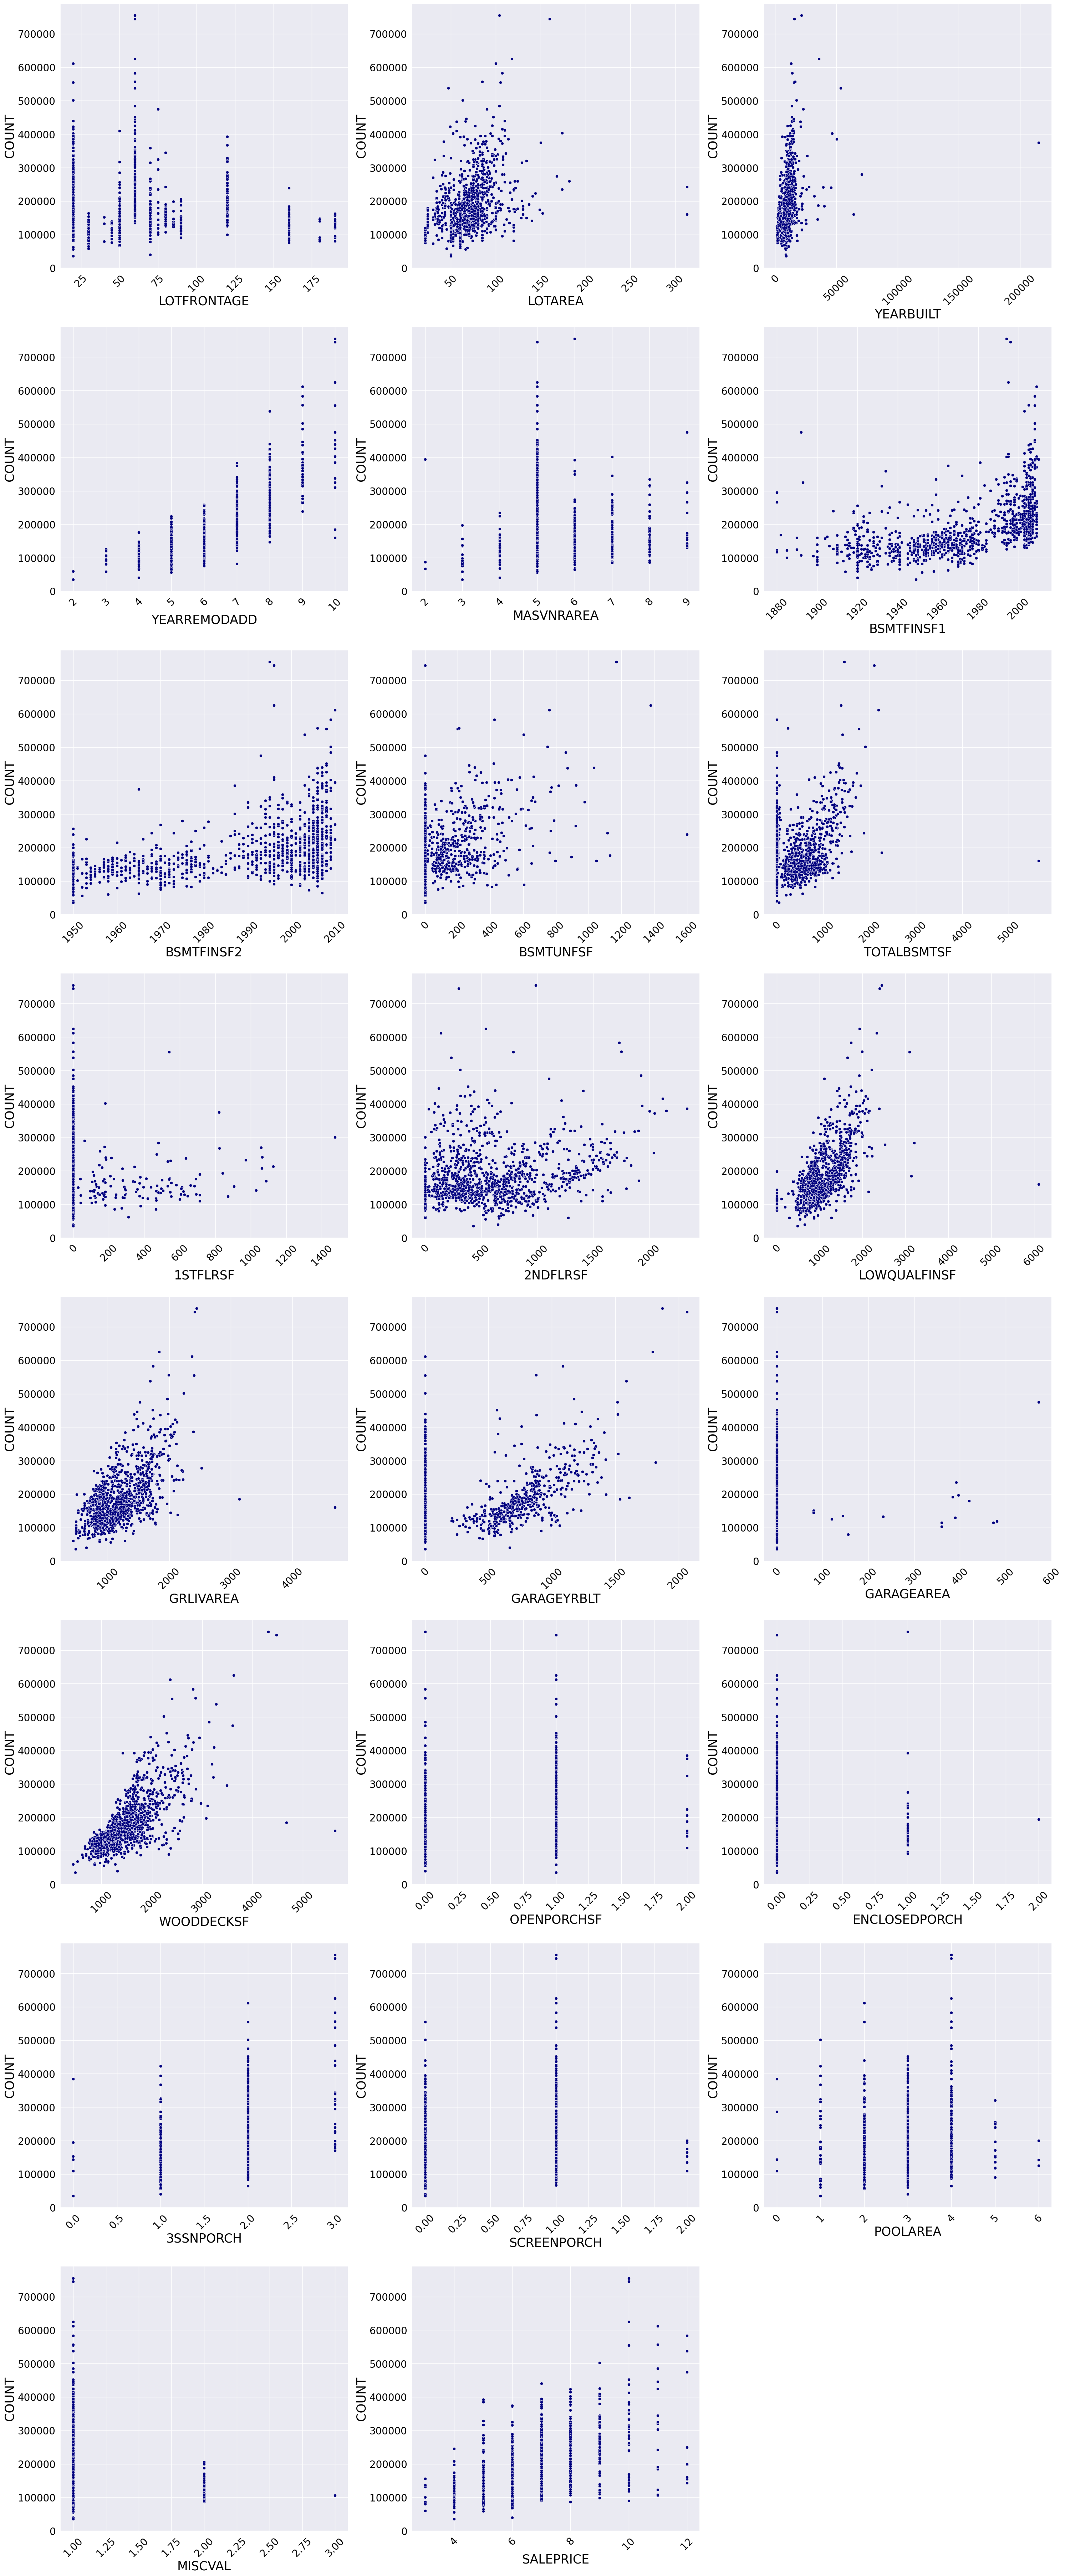

In [14]:
numeric_train = train.select_dtypes(exclude=['object'])

fig = plt.figure(figsize=(30,180))
for index,col in enumerate(num_cols):
    plt.subplot(20,3,index+1)
    
    sns.scatterplot(x=numeric_train.iloc[:,index], y='SalePrice', data=numeric_train.dropna(), color='navy')
    plt.ylabel('COUNT', size = 25,color="black" )
    plt.xlabel(col, fontsize = 25,color="black" )
    plt.xticks(size = 20,color="black", rotation = 45 )
    plt.yticks(size = 20,color="black" )
    
fig.tight_layout(pad=1.0)

<p style= "background-color:#30475E;font-family:Georgia;color:#FEFBE9;font-size:200%;text-align:center;border-radius:20px 60px;overflow:hidden;border-style:dotted;border-width:1.8px;border-color:#FEFBE9;"><b>Outlier Detection</b></p>

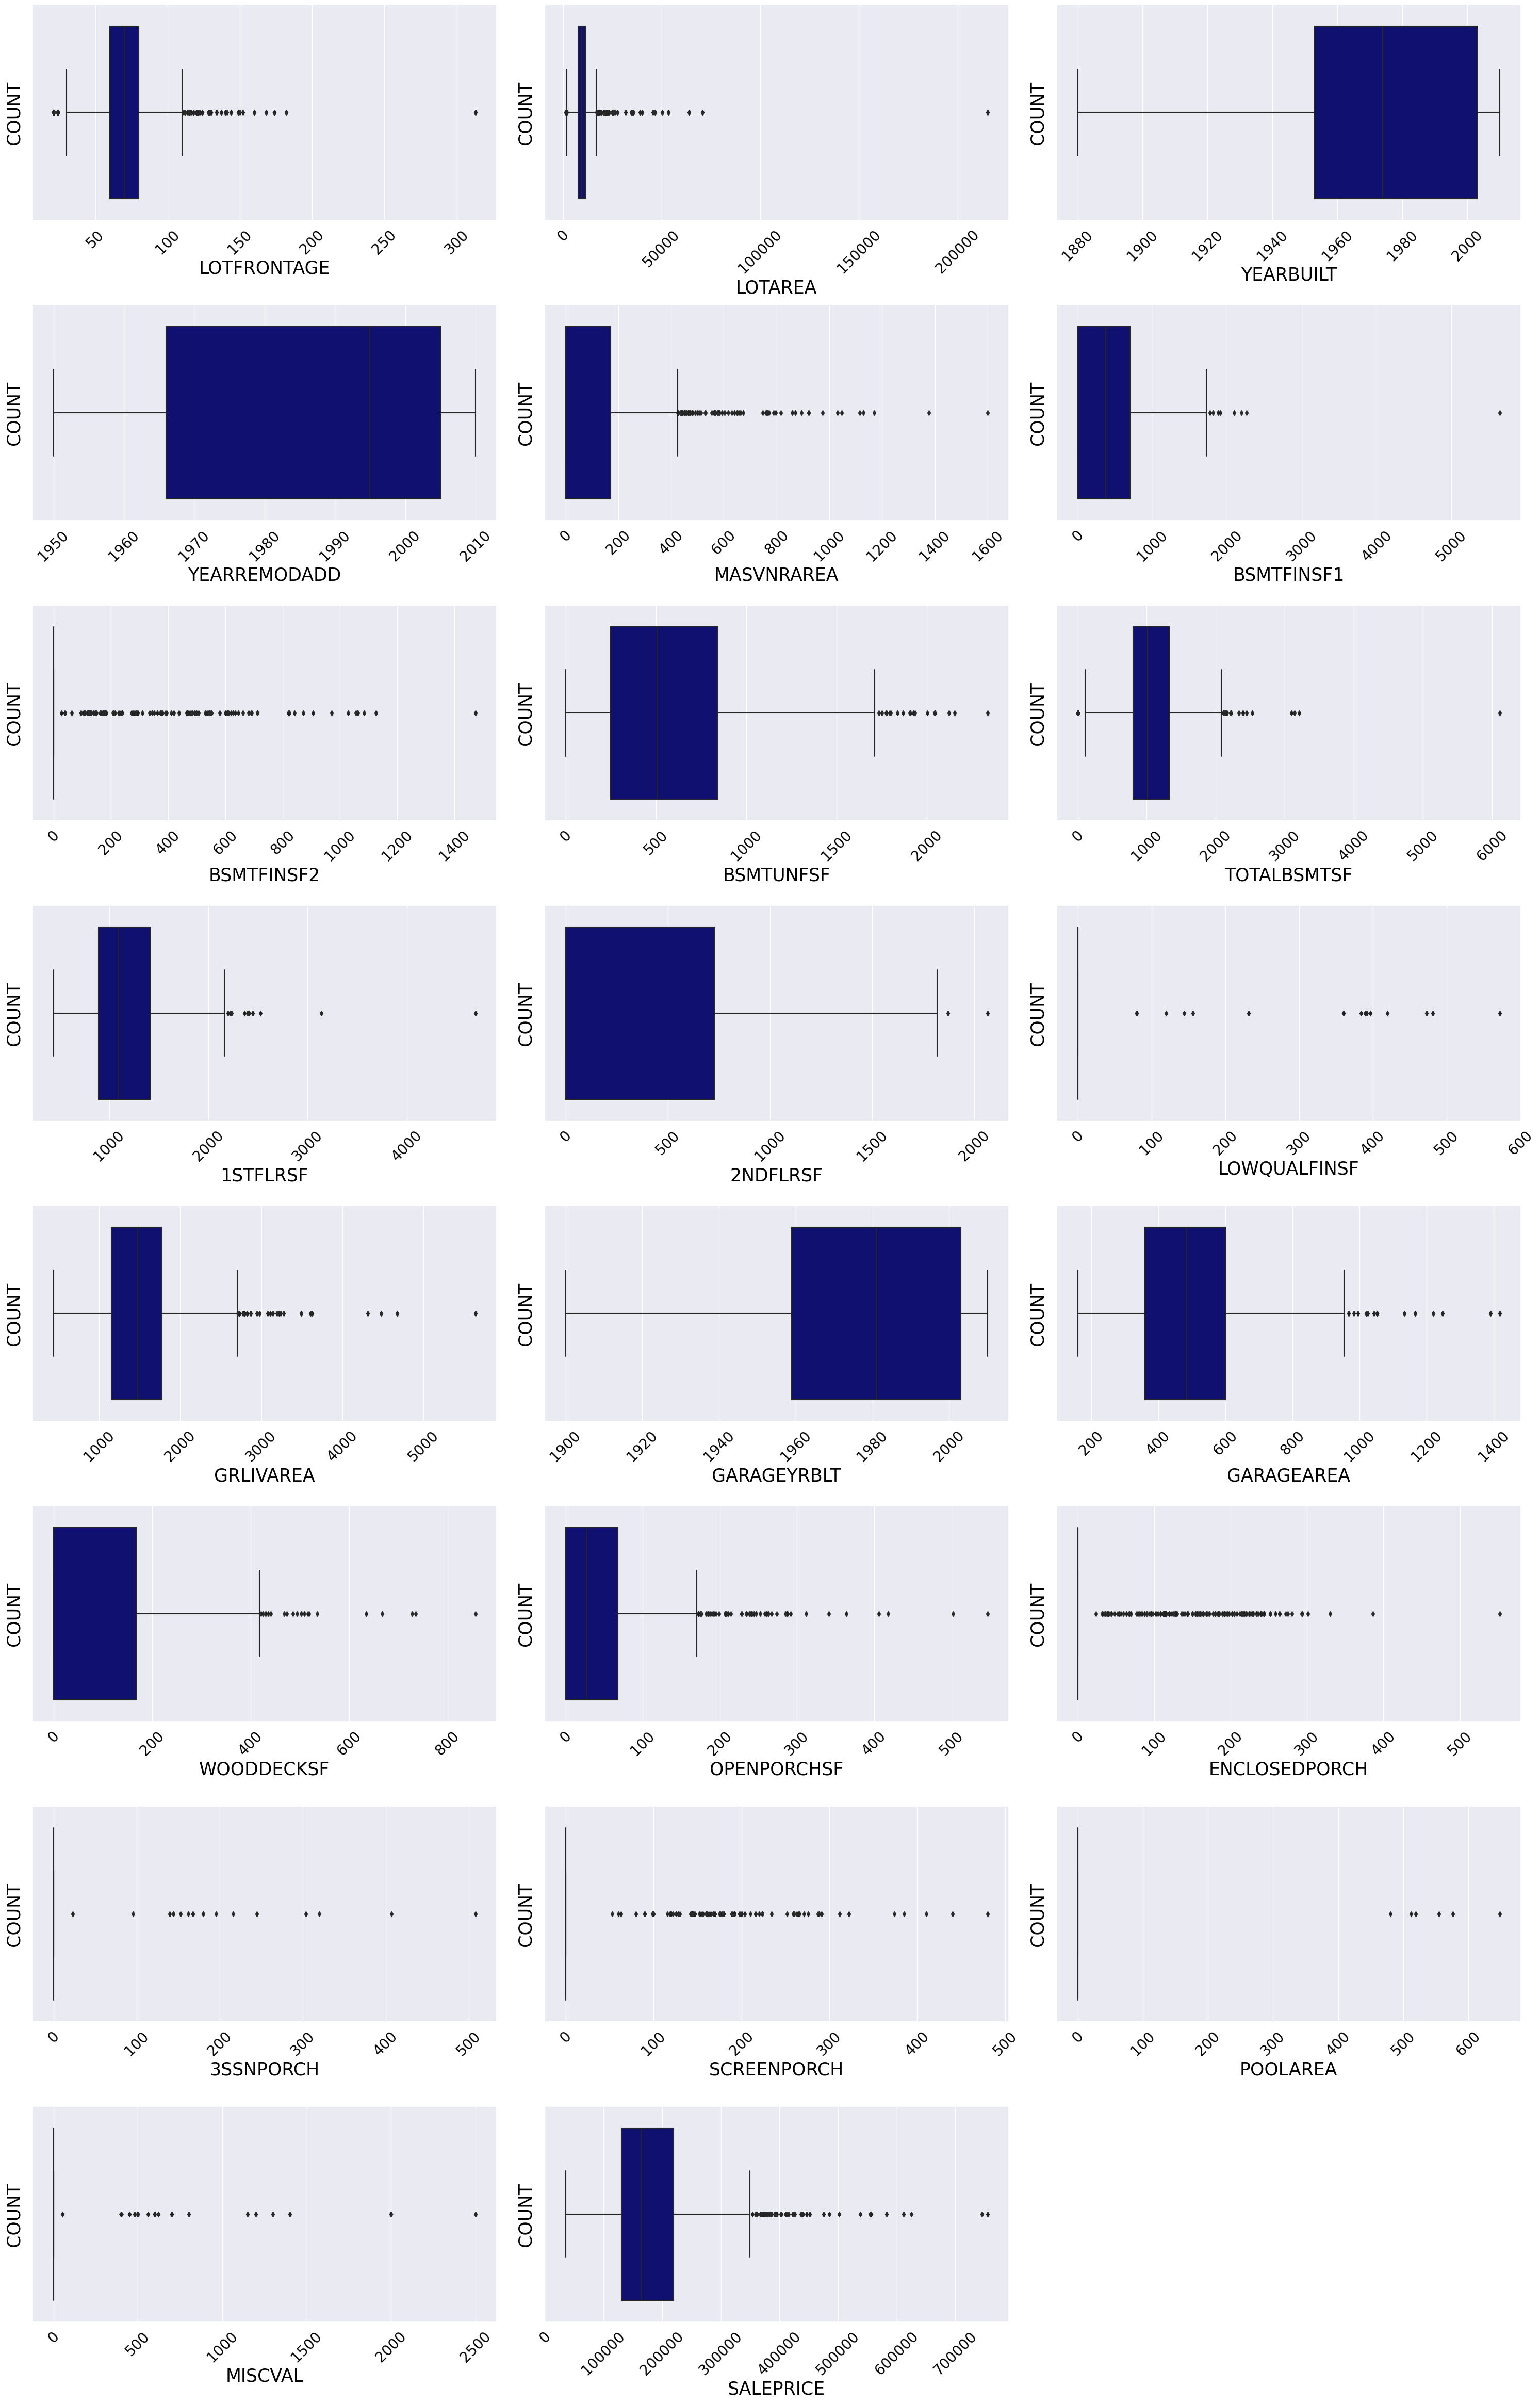

In [15]:
fig = plt.figure(figsize=(30,150))
for index,col in enumerate(num_cols):
    plt.subplot(26,3,index+1)
    sns.boxplot(x=col, data=num_cols_gen.dropna(), color='navy')
    plt.ylabel('COUNT', size = 25,color="black" )
    plt.xlabel(col, fontsize = 25,color="black" )
    plt.xticks(size = 20,color="black", rotation = 45 )
    plt.yticks(size = 20,color="black" )
    
fig.tight_layout(pad=1.0)

In [16]:
# Let's observe the lower and upper values of the outliers in our numerical variables.
num_cols = df.select_dtypes(exclude=['object']).drop(['MSSUBCLASS'], axis=1).columns


def outlier_thresholds(dataframe, col_name, q1=0.10, q3=0.90):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

# With the x function, we can confirm the existence of outliers in our variables.

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

    
    
for col in num_cols:
    print(col, check_outlier(df, col))

LOTFRONTAGE True
LOTAREA True
OVERALLQUAL False
OVERALLCOND True
YEARBUILT False
YEARREMODADD False
MASVNRAREA True
BSMTFINSF1 True
BSMTFINSF2 True
BSMTUNFSF False
TOTALBSMTSF True
2NDFLRSF False
LOWQUALFINSF True
GRLIVAREA True
BSMTFULLBATH True
BSMTHALFBATH True
FULLBATH True
HALFBATH False
BEDROOMABVGR True
KITCHENABVGR True
FIREPLACES True
GARAGECARS False
WOODDECKSF True
OPENPORCHSF True
ENCLOSEDPORCH True
3SSNPORCH True
SCREENPORCH True
POOLAREA True
MISCVAL True
MOSOLD False
YRSOLD False
SALEPRICE True


In [17]:
# We suppress our outliers with the 'replace_with_thresholds' function.
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

for col in num_cols:
    replace_with_thresholds(df, col)
    
# When we check for outliers with the y function, we observe the result.   
for col in num_cols:
    print(col, check_outlier(df, col))

LOTFRONTAGE False
LOTAREA False
OVERALLQUAL False
OVERALLCOND False
YEARBUILT False
YEARREMODADD False
MASVNRAREA False
BSMTFINSF1 False
BSMTFINSF2 False
BSMTUNFSF False
TOTALBSMTSF False
2NDFLRSF False
LOWQUALFINSF False
GRLIVAREA False
BSMTFULLBATH False
BSMTHALFBATH False
FULLBATH False
HALFBATH False
BEDROOMABVGR False
KITCHENABVGR False
FIREPLACES False
GARAGECARS False
WOODDECKSF False
OPENPORCHSF False
ENCLOSEDPORCH False
3SSNPORCH False
SCREENPORCH False
POOLAREA False
MISCVAL False
MOSOLD False
YRSOLD False
SALEPRICE False


In [18]:
# frekansı en yüksek olan uniq değerin diğer değişkenlerin toplamına oranı çok baskın olanları uçuralım

############################################################################

cat_cols = df.select_dtypes(include=['object']).columns

overfit_cat = []
for i in cat_cols:
    counts = df[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(df) * 100 > 95:
        overfit_cat.append(i)

overfit_cat = list(overfit_cat)
df = df.drop(overfit_cat, axis=1)

##############################################################################

num_cols = df.select_dtypes(exclude=['object']).columns

overfit_num = []
for i in num_cols:
    counts = df[i].value_counts()
    zeros = counts.iloc[0]
    if zeros / len(df) * 100 > 95:
        overfit_num.append(i)

overfit_num = list(overfit_num)
df = df.drop(overfit_num, axis=1)

print(" overfit_cat ".center(150,'~'))
print("Categorical Features with >95% of the same value: ",overfit_cat)
print(" overfit_num ".center(150,'~'))
print("Numerical Features with >95% of the same value: ",overfit_num)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ overfit_cat ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Categorical Features with >95% of the same value:  ['STREET', 'UTILITIES', 'LANDSLOPE', 'CONDITION2', 'ROOFMATL', 'HEATING']
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ overfit_num ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Numerical Features with >95% of the same value:  ['LOWQUALFINSF', 'BSMTHALFBATH', 'KITCHENABVGR', '3SSNPORCH', 'SCREENPORCH', 'POOLAREA', 'MISCVAL']


In [19]:
df.head()

MSSUBCLASS MSZONING  LOTFRONTAGE   LOTAREA ALLEY LOTSHAPE LANDCONTOUR LOTCONFIG NEIGHBORHOOD CONDITION1 BLDGTYPE HOUSESTYLE  OVERALLQUAL  OVERALLCOND  YEARBUILT  YEARREMODADD ROOFSTYLE EXTERIOR1ST EXTERIOR2ND MASVNRTYPE  MASVNRAREA EXTERQUAL EXTERCOND FOUNDATION BSMTQUAL BSMTCOND BSMTEXPOSURE BSMTFINTYPE1  BSMTFINSF1 BSMTFINTYPE2  BSMTFINSF2  BSMTUNFSF  TOTALBSMTSF HEATINGQC CENTRALAIR ELECTRICAL  2NDFLRSF  GRLIVAREA  BSMTFULLBATH  FULLBATH  HALFBATH  BEDROOMABVGR KITCHENQUAL FUNCTIONAL  \
Id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
1           60       RL       65.000  8450.000   NaN      Reg         Lvl    Inside      CollgCr       Norm     1Fam     2Story        7.000            5       2003      2003.000     Gable     VinylSd     VinylSd    BrkFace     196.000        Gd        TA      PConc       Gd       TA           No          GLQ     706.000          Unf       0.000    150.000      856.000        Ex          Y      SBrkr   854.000   1710.000         1.000     2.000     1.000             3          Gd        Typ   
2           20       RL       80.000  9600.000   NaN      Reg         Lvl       FR2      Veenker      Feedr     1Fam     1Story        6.000            8       1976      1976.000     Gable     MetalSd     MetalSd       None       0.000        TA        TA     CBlock       Gd       TA           Gd          ALQ     978.000          Unf       0.000    284.000     1262.000        Ex          Y      SBrkr     0.000   1262.000         0.000     2.000     0.000             3          TA        Typ   
3           60       RL       68.000 11250.000   NaN      IR1         Lvl    Inside      CollgCr       Norm     1Fam     2Story        7.000            5       2001      2002.000     Gable     VinylSd     VinylSd    BrkFace     162.000        Gd        TA      PConc       Gd       TA           Mn          GLQ     486.000          Unf       0.000    434.000      920.000        Ex          Y      SBrkr   866.000   1786.000         1.000     2.000     1.000             3          Gd        Typ   
4           70       RL       60.000  9550.000   NaN      IR1         Lvl    Corner      Crawfor       Norm     1Fam     2Story        7.000            5       1915      1970.000     Gable     Wd Sdng     Wd Shng       None       0.000        TA        TA     BrkTil       TA       Gd           No          ALQ     216.000          Unf       0.000    540.000      756.000        Gd          Y      SBrkr   756.000   1717.000         1.000     1.000     0.000             3          Gd        Typ   
5           60       RL       84.000 14260.000   NaN      IR1         Lvl       FR2      NoRidge       Norm     1Fam     2Story        8.000            5       2000      2000.000     Gable     VinylSd     VinylSd    BrkFace     350.000        Gd        TA      PConc       Gd       TA           Av          GLQ     655.000          Unf       0.000    490.000     1145.000        Ex          Y      SBrkr  1053.000   2198.000         1.000     2.000     1.000             4          Gd        Typ   

    FIREPLACES FIREPLACEQU GARAGETYPE GARAGEFINISH  GARAGECARS GARAGEQUAL GARAGECOND PAVEDDRIVE  WOODDECKSF  OPENPORCHSF  ENCLOSEDPORCH POOLQC FENCE MISCFEATURE  MOSOLD  YRSOLD SALETYPE SALECONDITION  SALEPRICE  
Id                                                                                                                                                                                                                  
1        0.000         NaN     Attchd          RFn       2.000         TA         TA

<p style= "background-color:#30475E;font-family:Georgia;color:#FEFBE9;font-size:200%;text-align:center;border-radius:20px 60px;overflow:hidden;border-style:dotted;border-width:1.8px;border-color:#FEFBE9;"><b>MISSING VALUES</b></p>

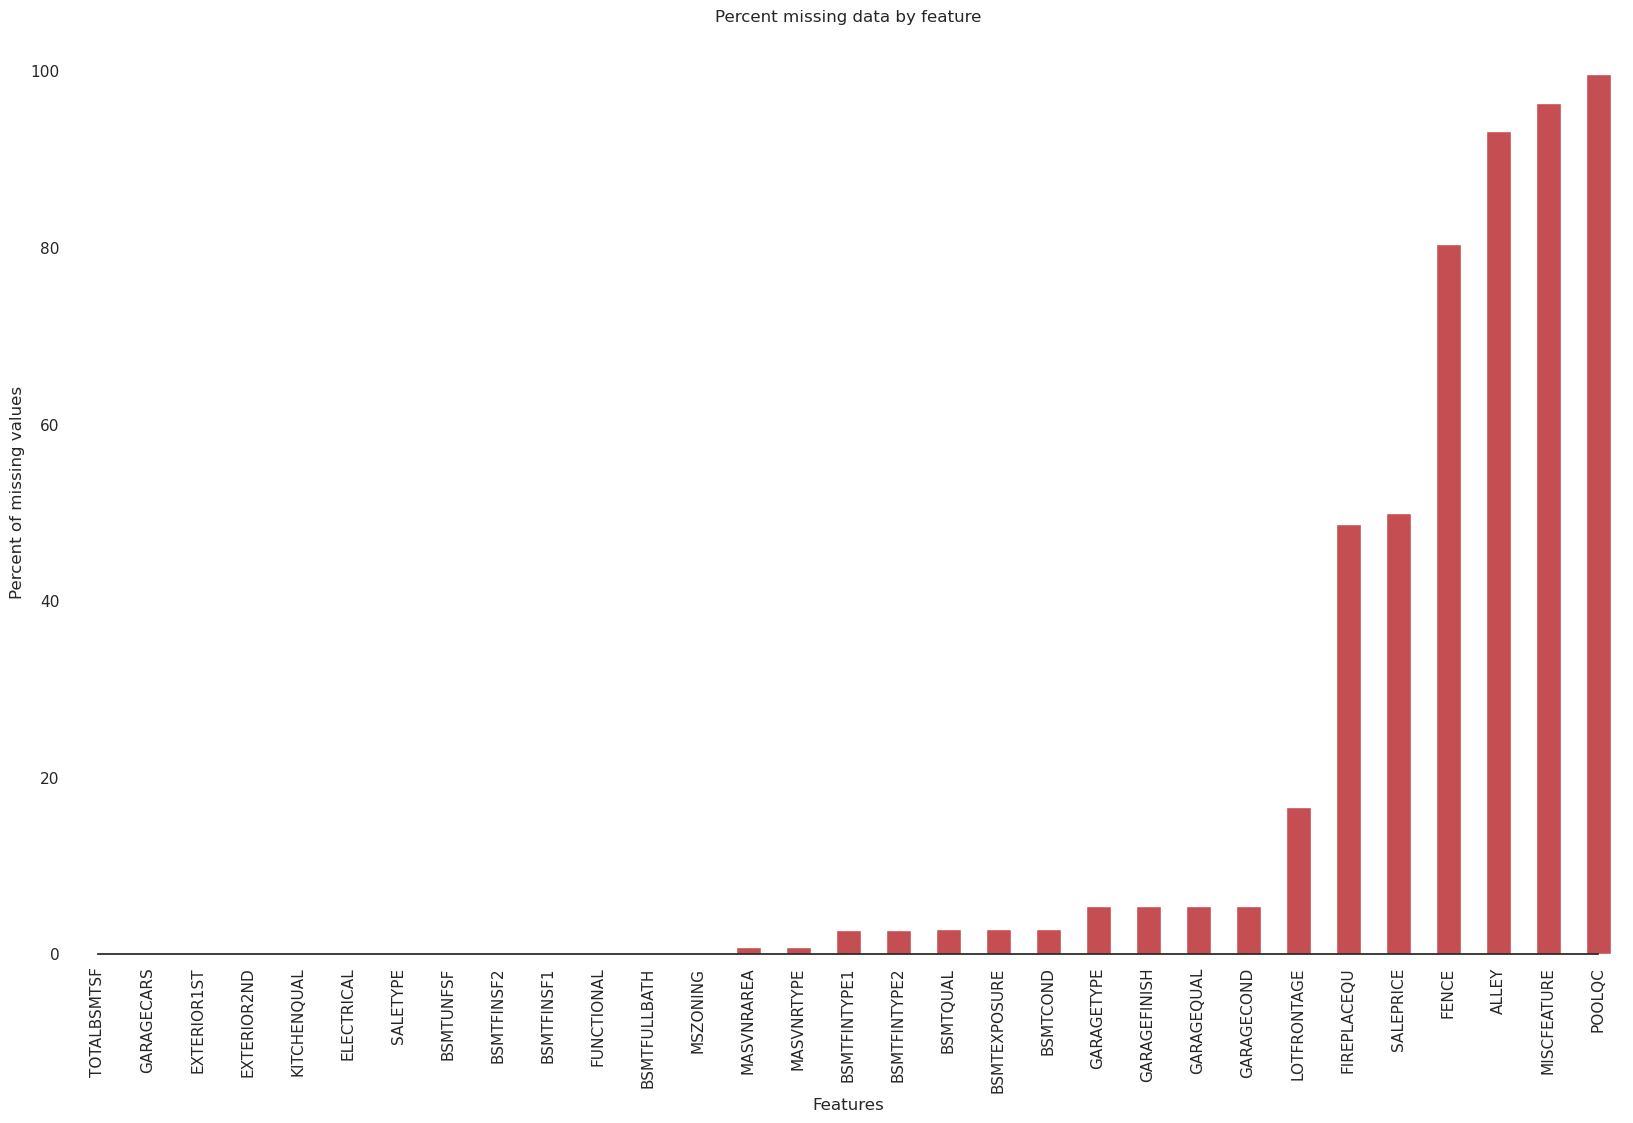

In [20]:
# Visualize missing values
sns.set_style("white")
f, ax = plt.subplots(figsize=(20, 12))
sns.set_color_codes(palette='deep')
missing = round(df.isnull().mean()*100,2)
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color="r")
# Tweak the visual presentation
ax.xaxis.grid(False)
ax.set(ylabel="Percent of missing values")
ax.set(xlabel="Features")
ax.set(title="Percent missing data by feature")
sns.despine(trim=True, left=True)

In [21]:
# havuz kalitesi, çeşitli değ., patikaya ulaşım
df.drop(['POOLQC','MISCFEATURE','ALLEY'], axis=1, inplace=True)


In [22]:
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns
        
        
# Detailed examination of Missing Values
na_cols = missing_values_table(df, True)

              n_miss  ratio
FENCE           2348 80.440
SALEPRICE       1459 49.980
FIREPLACEQU     1420 48.650
LOTFRONTAGE      486 16.650
GARAGECOND       159  5.450
GARAGEQUAL       159  5.450
GARAGEFINISH     159  5.450
GARAGETYPE       157  5.380
BSMTCOND          82  2.810
BSMTEXPOSURE      82  2.810
BSMTQUAL          81  2.770
BSMTFINTYPE2      80  2.740
BSMTFINTYPE1      79  2.710
MASVNRTYPE        24  0.820
MASVNRAREA        23  0.790
MSZONING           4  0.140
BSMTFULLBATH       2  0.070
FUNCTIONAL         2  0.070
KITCHENQUAL        1  0.030
ELECTRICAL         1  0.030
BSMTUNFSF          1  0.030
BSMTFINSF2         1  0.030
GARAGECARS         1  0.030
BSMTFINSF1         1  0.030
EXTERIOR2ND        1  0.030
EXTERIOR1ST        1  0.030
SALETYPE           1  0.030
TOTALBSMTSF        1  0.030


In [23]:
# columns where NaN values have meaning e.g. no pool etc.
cols_fillna = ['GARAGETYPE',
 'GARAGEFINISH',
 'BSMTFINTYPE2',
 'BSMTEXPOSURE',
 'BSMTFINTYPE1',
 'GARAGECOND',
 'GARAGEQUAL',
 'BSMTCOND',
 'BSMTQUAL',
 'FIREPLACEQU',
 'FENCE',
 'KITCHENQUAL',
 'HEATINGQC',
 'EXTERQUAL', 
 'EXTERCOND']


# replace 'NaN' with 'None' in these columns
for col in cols_fillna:
    df[col].fillna('NA',inplace=True)
    
    
missing_values_table(df)
    

              n_miss  ratio
SALEPRICE       1459 49.980
LOTFRONTAGE      486 16.650
MASVNRTYPE        24  0.820
MASVNRAREA        23  0.790
MSZONING           4  0.140
BSMTFULLBATH       2  0.070
FUNCTIONAL         2  0.070
EXTERIOR1ST        1  0.030
EXTERIOR2ND        1  0.030
BSMTFINSF1         1  0.030
BSMTFINSF2         1  0.030
BSMTUNFSF          1  0.030
TOTALBSMTSF        1  0.030
ELECTRICAL         1  0.030
GARAGECARS         1  0.030
SALETYPE           1  0.030


In [24]:
df.head()

MSSUBCLASS MSZONING  LOTFRONTAGE   LOTAREA LOTSHAPE LANDCONTOUR LOTCONFIG NEIGHBORHOOD CONDITION1 BLDGTYPE HOUSESTYLE  OVERALLQUAL  OVERALLCOND  YEARBUILT  YEARREMODADD ROOFSTYLE EXTERIOR1ST EXTERIOR2ND MASVNRTYPE  MASVNRAREA EXTERQUAL EXTERCOND FOUNDATION BSMTQUAL BSMTCOND BSMTEXPOSURE BSMTFINTYPE1  BSMTFINSF1 BSMTFINTYPE2  BSMTFINSF2  BSMTUNFSF  TOTALBSMTSF HEATINGQC CENTRALAIR ELECTRICAL  2NDFLRSF  GRLIVAREA  BSMTFULLBATH  FULLBATH  HALFBATH  BEDROOMABVGR KITCHENQUAL FUNCTIONAL  \
Id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
1           60       RL       65.000  8450.000      Reg         Lvl    Inside      CollgCr       Norm     1Fam     2Story        7.000            5       2003      2003.000     Gable     VinylSd     VinylSd    BrkFace     196.000        Gd        TA      PConc       Gd       TA           No          GLQ     706.000          Unf       0.000    150.000      856.000        Ex          Y      SBrkr   854.000   1710.000         1.000     2.000     1.000             3          Gd        Typ   
2           20       RL       80.000  9600.000      Reg         Lvl       FR2      Veenker      Feedr     1Fam     1Story        6.000            8       1976      1976.000     Gable     MetalSd     MetalSd       None       0.000        TA        TA     CBlock       Gd       TA           Gd          ALQ     978.000          Unf       0.000    284.000     1262.000        Ex          Y      SBrkr     0.000   1262.000         0.000     2.000     0.000             3          TA        Typ   
3           60       RL       68.000 11250.000      IR1         Lvl    Inside      CollgCr       Norm     1Fam     2Story        7.000            5       2001      2002.000     Gable     VinylSd     VinylSd    BrkFace     162.000        Gd        TA      PConc       Gd       TA           Mn          GLQ     486.000          Unf       0.000    434.000      920.000        Ex          Y      SBrkr   866.000   1786.000         1.000     2.000     1.000             3          Gd        Typ   
4           70       RL       60.000  9550.000      IR1         Lvl    Corner      Crawfor       Norm     1Fam     2Story        7.000            5       1915      1970.000     Gable     Wd Sdng     Wd Shng       None       0.000        TA        TA     BrkTil       TA       Gd           No          ALQ     216.000          Unf       0.000    540.000      756.000        Gd          Y      SBrkr   756.000   1717.000         1.000     1.000     0.000             3          Gd        Typ   
5           60       RL       84.000 14260.000      IR1         Lvl       FR2      NoRidge       Norm     1Fam     2Story        8.000            5       2000      2000.000     Gable     VinylSd     VinylSd    BrkFace     350.000        Gd        TA      PConc       Gd       TA           Av          GLQ     655.000          Unf       0.000    490.000     1145.000        Ex          Y      SBrkr  1053.000   2198.000         1.000     2.000     1.000             4          Gd        Typ   

    FIREPLACES FIREPLACEQU GARAGETYPE GARAGEFINISH  GARAGECARS GARAGEQUAL GARAGECOND PAVEDDRIVE  WOODDECKSF  OPENPORCHSF  ENCLOSEDPORCH FENCE  MOSOLD  YRSOLD SALETYPE SALECONDITION  SALEPRICE  
Id                                                                                                                                                                                               
1        0.000          NA     Attchd          RFn       2.000         TA         TA          Y       0.000       61.000              0    NA   2.000    2008       

In [25]:
#categorical
cols = ['MASVNRTYPE',
 'MSZONING',
 'EXTERIOR1ST',
 'EXTERIOR2ND',
 'SALETYPE',
 'ELECTRICAL',
'FUNCTIONAL'
]
#categorical


df[cols] = df.groupby("NEIGHBORHOOD")[cols].transform(lambda x: x.fillna(x.mode()[0]))

missing_values_table(df)


              n_miss  ratio
SALEPRICE       1459 49.980
LOTFRONTAGE      486 16.650
MASVNRAREA        23  0.790
BSMTFULLBATH       2  0.070
BSMTFINSF1         1  0.030
BSMTFINSF2         1  0.030
BSMTUNFSF          1  0.030
TOTALBSMTSF        1  0.030
GARAGECARS         1  0.030


In [26]:
#numerical
nums = ['BSMTFULLBATH',
 'BSMTFINSF1',
 'BSMTUNFSF',
 'TOTALBSMTSF',
 'MASVNRAREA',
# 'BSMTHALFBATH',
 'BSMTFINSF2']


df[nums] = df[nums].fillna(df[nums].mean())




#for correlated relationship
df['LOTFRONTAGE'] = df.groupby('NEIGHBORHOOD')['LOTFRONTAGE'].transform(lambda x: x.fillna(x.mean())) # caddenin genisligi
df['GARAGECARS'] = df.groupby('NEIGHBORHOOD')['GARAGECARS'].transform(lambda x: x.fillna(x.mean()))
# garajin araba kapasitesi

missing_values_table(df)

           n_miss  ratio
SALEPRICE    1459 49.980


<p style= "background-color:#30475E;font-family:Georgia;color:#FEFBE9;font-size:200%;text-align:center;border-radius:20px 60px;overflow:hidden;border-style:dotted;border-width:1.8px;border-color:#FEFBE9;"><b>FEATURE EXT.</b></p>


In [27]:
df['MSSUBCLASS'].dtypes

dtype('int64')

In [28]:
df['MSSUBCLASS'] = df['MSSUBCLASS'].apply(str)
# yapi tipi

In [29]:
# GarageCond: Garage condition

#        Ex	Excellent
#        Gd	Good
#        TA	Typical/Average
#        Fa	Fair
#        Po	Poor
#        NA	No Garage

ordinal_map = {'Ex': 5,'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'NA':0}
fintype_map = {'GLQ': 6,'ALQ': 5,'BLQ': 4,'Rec': 3,'LwQ': 2,'Unf': 1, 'NA': 0}
expose_map = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'NA': 0}
fence_map = {'GdPrv': 4,'MnPrv': 3,'GdWo': 2, 'MnWw': 1,'NA': 0}

ord_col = ['EXTERQUAL',
 'EXTERCOND',
 'BSMTQUAL',
 'BSMTCOND',
 'HEATINGQC',
 'KITCHENQUAL',
 'GARAGEQUAL',
 'FIREPLACEQU',
 'GARAGECOND']

# apply() : Seri değerlerine bir fonksiyon uygulamak istediğinizde kullanılır.
# map() : Her değeri başka bir değerle değiştirmek için kullanılır.

for col in ord_col:
    df[col] = df[col].map(ordinal_map)
    
fin_col = ['BSMTFINTYPE1','BSMTFINTYPE2']
for col in fin_col:
    df[col] = df[col].map(fintype_map)

df['BSMTEXPOSURE'] = df['BSMTEXPOSURE'].map(expose_map)
df['FENCE'] = df['FENCE'].map(fence_map)



    
df['TOTALBSMTFIN'] = df['BSMTFINSF1'] + df['BSMTFINSF2']
df['TOTALSF'] = df['TOTALBSMTSF'] + df['2NDFLRSF']
df['TOTALBATH'] = df['FULLBATH'] + df['HALFBATH']
df['TOTALPORCH'] = df['OPENPORCHSF'] + df['ENCLOSEDPORCH']

df['TOTALLOT'] = df['LOTFRONTAGE'] + df['LOTAREA']



colum = ['MASVNRAREA','TOTALBSMTSF','2NDFLRSF','WOODDECKSF', 'TOTALBSMTFIN', 'TOTALPORCH']

for col in colum:
    col_name = col+'_bin'
    df[col_name] = df[col].apply(lambda x: 1 if x > 0 else 0)
df.head()


MSSUBCLASS MSZONING  LOTFRONTAGE   LOTAREA LOTSHAPE LANDCONTOUR LOTCONFIG NEIGHBORHOOD CONDITION1 BLDGTYPE HOUSESTYLE  OVERALLQUAL  OVERALLCOND  YEARBUILT  YEARREMODADD ROOFSTYLE EXTERIOR1ST EXTERIOR2ND MASVNRTYPE  MASVNRAREA  EXTERQUAL  EXTERCOND FOUNDATION  BSMTQUAL  BSMTCOND  BSMTEXPOSURE  BSMTFINTYPE1  BSMTFINSF1  BSMTFINTYPE2  BSMTFINSF2  BSMTUNFSF  TOTALBSMTSF  HEATINGQC CENTRALAIR ELECTRICAL  2NDFLRSF  GRLIVAREA  BSMTFULLBATH  FULLBATH  HALFBATH  BEDROOMABVGR  KITCHENQUAL FUNCTIONAL  \
Id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
1          60       RL       65.000  8450.000      Reg         Lvl    Inside      CollgCr       Norm     1Fam     2Story        7.000            5       2003      2003.000     Gable     VinylSd     VinylSd    BrkFace     196.000          4          3      PConc         4         3             1             6     706.000             1       0.000    150.000      856.000          5          Y      SBrkr   854.000   1710.000         1.000     2.000     1.000             3            4        Typ   
2          20       RL       80.000  9600.000      Reg         Lvl       FR2      Veenker      Feedr     1Fam     1Story        6.000            8       1976      1976.000     Gable     MetalSd     MetalSd       None       0.000          3          3     CBlock         4         3             4             5     978.000             1       0.000    284.000     1262.000          5          Y      SBrkr     0.000   1262.000         0.000     2.000     0.000             3            3        Typ   
3          60       RL       68.000 11250.000      IR1         Lvl    Inside      CollgCr       Norm     1Fam     2Story        7.000            5       2001      2002.000     Gable     VinylSd     VinylSd    BrkFace     162.000          4          3      PConc         4         3             2             6     486.000             1       0.000    434.000      920.000          5          Y      SBrkr   866.000   1786.000         1.000     2.000     1.000             3            4        Typ   
4          70       RL       60.000  9550.000      IR1         Lvl    Corner      Crawfor       Norm     1Fam     2Story        7.000            5       1915      1970.000     Gable     Wd Sdng     Wd Shng       None       0.000          3          3     BrkTil         3         4             1             5     216.000             1       0.000    540.000      756.000          4          Y      SBrkr   756.000   1717.000         1.000     1.000     0.000             3            4        Typ   
5          60       RL       84.000 14260.000      IR1         Lvl       FR2      NoRidge       Norm     1Fam     2Story        8.000            5       2000      2000.000     Gable     VinylSd     VinylSd    BrkFace     350.000          4          3      PConc         4         3             3             6     655.000             1       0.000    490.000     1145.000          5          Y      SBrkr  1053.000   2198.000         1.000     2.000     1.000             4            4        Typ   

    FIREPLACES  FIREPLACEQU GARAGETYPE GARAGEFINISH  GARAGECARS  GARAGEQUAL  GARAGECOND PAVEDDRIVE  WOODDECKSF  OPENPORCHSF  ENCLOSEDPORCH  FENCE  MOSOLD  YRSOLD SALETYPE SALECONDITION  SALEPRICE  TOTALBSMTFIN  TOTALSF  TOTALBATH  TOTALPORCH  TOTALLOT  MASVNRAREA_bin  TOTALBSMTSF_bin  2NDFLRSF_bin  WOODDECKSF_bin  TOTALBSMTFIN_bin  TOTALPORCH_bin  
Id                                                                                                                                              

In [30]:
df.drop("SALEPRICE", axis=1, inplace=True)

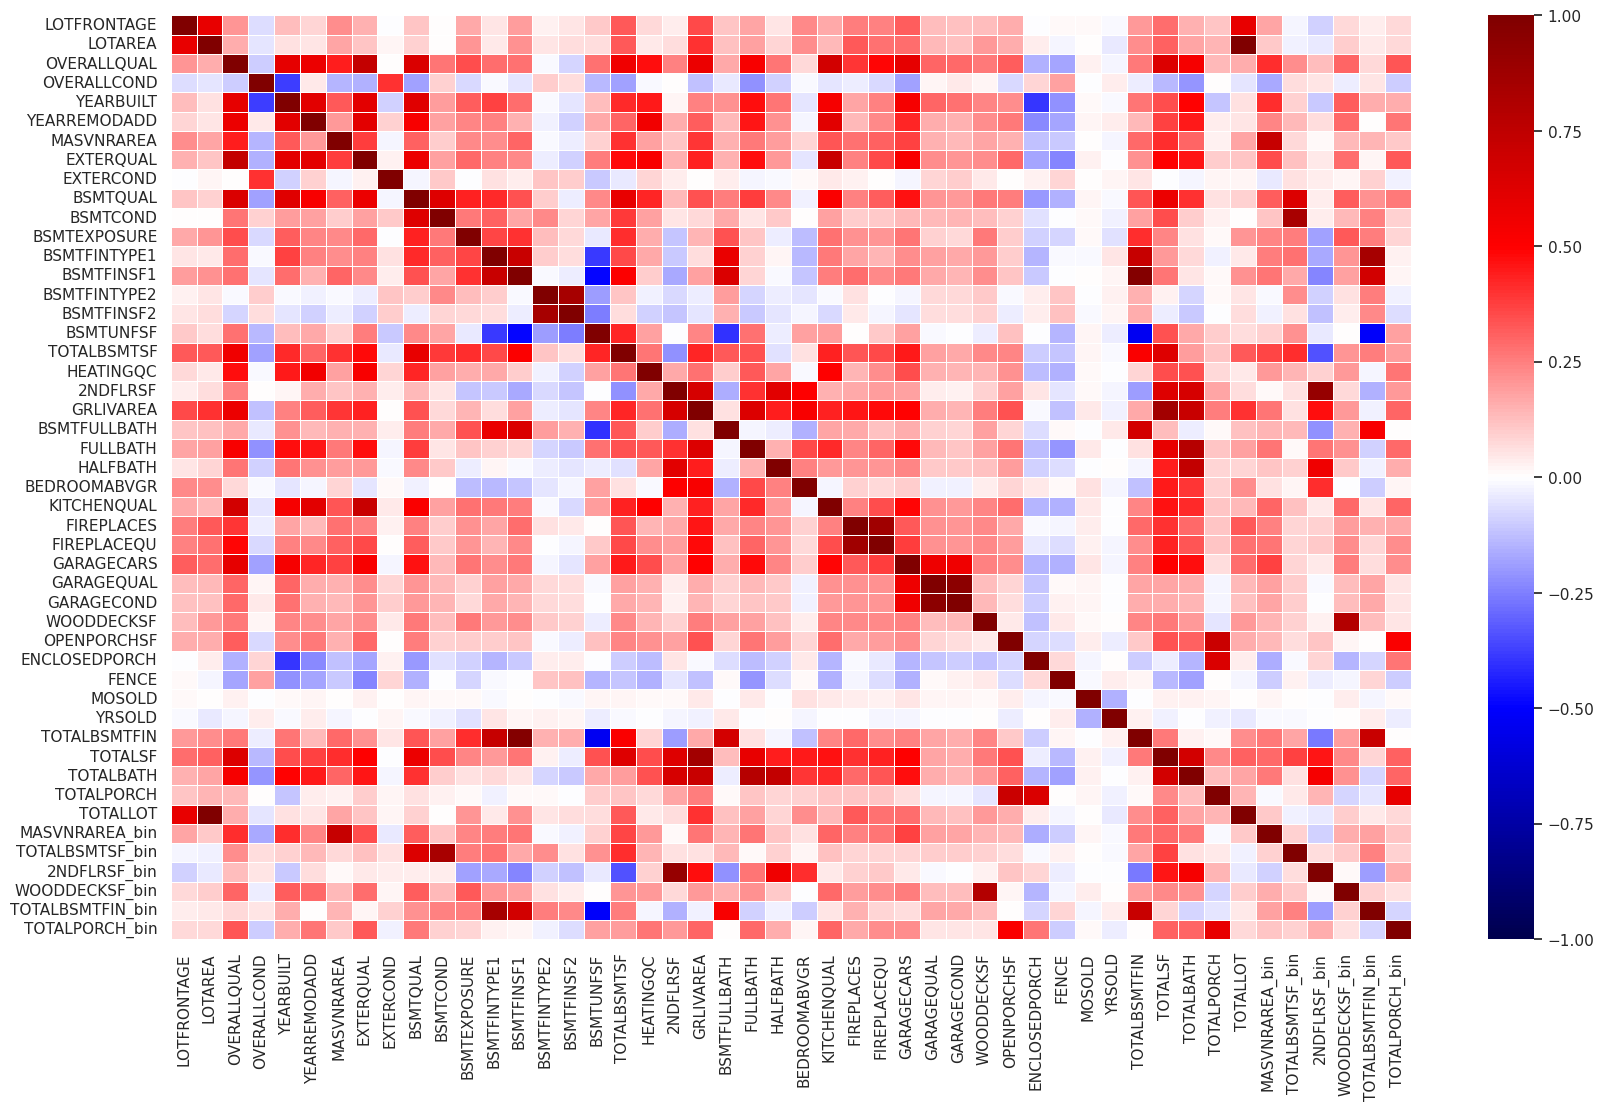

['GARAGECOND', 'TOTALBSMTFIN', 'TOTALLOT', '2NDFLRSF_bin']


In [31]:
num_cols = df.select_dtypes(exclude=['object'])

def high_correlated_cols(dataframe, plot=False, corr_th=0.90):
    corr = dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool_))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if plot:
        sns.set(rc={'figure.figsize': (20, 12)})
        sns.heatmap(corr, linewidth=0.5, cmap="seismic", vmin=-1, vmax=1, fmt='.1f')
        plt.show(block=True)
    return drop_list
    print(drop_list)

    
drop_list = high_correlated_cols(num_cols, plot=True)

print(drop_list)

In [32]:
drop_list = [col for col in drop_list if col != 'SALEPRICE']
drop_list

['GARAGECOND', 'TOTALBSMTFIN', 'TOTALLOT', '2NDFLRSF_bin']

<p style= "background-color:#30475E;font-family:Georgia;color:#FEFBE9;font-size:200%;text-align:center;border-radius:20px 60px;overflow:hidden;border-style:dotted;border-width:1.8px;border-color:#FEFBE9;"><b>ENCODING SCALLING</b></p>

In [33]:
def rare_encoder(dataframe, rare_perc):
    temp_df = dataframe.copy()

    rare_columns = [col for col in temp_df.columns if temp_df[col].dtypes == 'O'
                    and (temp_df[col].value_counts() / len(temp_df) < rare_perc).any(axis=None)]

    for var in rare_columns:
        tmp = temp_df[var].value_counts() / len(temp_df)
        rare_labels = tmp[tmp < rare_perc].index
        temp_df[var] = np.where(temp_df[var].isin(rare_labels), 'Rare', temp_df[var])

    return temp_df

df=rare_encoder(df, 0.01)

df['FOUNDATION'].value_counts()

PConc     1308
CBlock    1235
BrkTil     311
Slab        49
Rare        16
Name: FOUNDATION, dtype: int64

In [34]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

binary_cols = [col for col in df.columns if df[col].dtype not in [int, float]
               and df[col].nunique() == 2]

print(binary_cols)

for col in binary_cols:
    label_encoder(df, col)

['CENTRALAIR']


In [35]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

ohe_cols = [col for col in df.columns if 30 >= df[col].nunique() > 2]
ohe_cols=ohe_cols.append('NEIGHBORHOOD')
print(ohe_cols)

df = one_hot_encoder(df, ohe_cols)
df.head()

None


LOTFRONTAGE   LOTAREA  OVERALLQUAL  OVERALLCOND  YEARBUILT  YEARREMODADD  MASVNRAREA  EXTERQUAL  EXTERCOND  BSMTQUAL  BSMTCOND  BSMTEXPOSURE  BSMTFINTYPE1  BSMTFINSF1  BSMTFINTYPE2  BSMTFINSF2  BSMTUNFSF  TOTALBSMTSF  HEATINGQC  CENTRALAIR  2NDFLRSF  GRLIVAREA  BSMTFULLBATH  FULLBATH  HALFBATH  BEDROOMABVGR  KITCHENQUAL  FIREPLACES  FIREPLACEQU  GARAGECARS  GARAGEQUAL  GARAGECOND  WOODDECKSF  OPENPORCHSF  ENCLOSEDPORCH  FENCE  MOSOLD  YRSOLD  TOTALBSMTFIN  TOTALSF  TOTALBATH  TOTALPORCH  \
Id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
1        65.000  8450.000        7.000            5       2003      2003.000     196.000          4          3         4         3             1             6     706.000             1       0.000    150.000      856.000          5           1   854.000   1710.000         1.000     2.000     1.000             3            4       0.000            0       2.000           3           3       0.000       61.000              0      0   2.000    2008       706.000 1710.000      3.000      61.000   
2        80.000  9600.000        6.000            8       1976      1976.000       0.000          3          3         4         3             4             5     978.000             1       0.000    284.000     1262.000          5           1     0.000   1262.000         0.000     2.000     0.000             3            3       1.000            3       2.000           3           3     298.000        0.000              0      0   5.000    2007       978.000 1262.000      2.000       0.000   
3        68.000 11250.000        7.000            5       2001      2002.000     162.000          4          3         4         3             2             6     486.000             1       0.000    434.000      920.000          5           1   866.000   1786.000         1.000     2.000     1.000             3            4       1.000            3       2.000           3           3       0.000       42.000              0      0   9.000    2008       486.000 1786.000      3.000      42.000   
4        60.000  9550.000        7.000            5       1915      1970.000       0.000          3          3         3         4             1             5     216.000             1       0.000    540.000      756.000          4           1   756.000   1717.000         1.000     1.000     0.000             3            4       1.000            4       3.000           3           3       0.000       35.000            272      0   2.000    2006       216.000 1512.000      1.000     307.000   
5        84.000 14260.000        8.000            5       2000      2000.000     350.000          4          3         4         3             3             6     655.000             1       0.000    490.000     1145.000          5           1  1053.000   2198.000         1.000     2.000     1.000             4            4       1.000            3       3.000           3           3     192.000       84.000              0      0  12.000    2008       655.000 2198.000      3.000      84.000   

    TOTALLOT  MASVNRAREA_bin  TOTALBSMTSF_bin  2NDFLRSF_bin  WOODDECKSF_bin  TOTALBSMTFIN_bin  TOTALPORCH_bin  MSSUBCLASS_160  MSSUBCLASS_190  MSSUBCLASS_20  MSSUBCLASS_30  MSSUBCLASS_50  MSSUBCLASS_60  MSSUBCLASS_70  MSSUBCLASS_80  MSSUBCLASS_85  MSSUBCLASS_90  MSSUBCLASS_Rare  MSZONING_RL  MSZONING_RM  MSZONING_Rare  LOTSHAPE_IR2  LOTSHAPE_Rare  LOTSHAPE_Reg  LANDCONTOUR_HLS  LANDCONTOUR_Low  LANDCONTOUR_Lvl  LOTCONFIG_CulDSac  LOTCONFIG_FR2  LOTCONFIG_Inside  LOTCONFIG_Rare  \
Id                       

In [36]:
df.head()

LOTFRONTAGE   LOTAREA  OVERALLQUAL  OVERALLCOND  YEARBUILT  YEARREMODADD  MASVNRAREA  EXTERQUAL  EXTERCOND  BSMTQUAL  BSMTCOND  BSMTEXPOSURE  BSMTFINTYPE1  BSMTFINSF1  BSMTFINTYPE2  BSMTFINSF2  BSMTUNFSF  TOTALBSMTSF  HEATINGQC  CENTRALAIR  2NDFLRSF  GRLIVAREA  BSMTFULLBATH  FULLBATH  HALFBATH  BEDROOMABVGR  KITCHENQUAL  FIREPLACES  FIREPLACEQU  GARAGECARS  GARAGEQUAL  GARAGECOND  WOODDECKSF  OPENPORCHSF  ENCLOSEDPORCH  FENCE  MOSOLD  YRSOLD  TOTALBSMTFIN  TOTALSF  TOTALBATH  TOTALPORCH  \
Id                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
1        65.000  8450.000        7.000            5       2003      2003.000     196.000          4          3         4         3             1             6     706.000             1       0.000    150.000      856.000          5           1   854.000   1710.000         1.000     2.000     1.000             3            4       0.000            0       2.000           3           3       0.000       61.000              0      0   2.000    2008       706.000 1710.000      3.000      61.000   
2        80.000  9600.000        6.000            8       1976      1976.000       0.000          3          3         4         3             4             5     978.000             1       0.000    284.000     1262.000          5           1     0.000   1262.000         0.000     2.000     0.000             3            3       1.000            3       2.000           3           3     298.000        0.000              0      0   5.000    2007       978.000 1262.000      2.000       0.000   
3        68.000 11250.000        7.000            5       2001      2002.000     162.000          4          3         4         3             2             6     486.000             1       0.000    434.000      920.000          5           1   866.000   1786.000         1.000     2.000     1.000             3            4       1.000            3       2.000           3           3       0.000       42.000              0      0   9.000    2008       486.000 1786.000      3.000      42.000   
4        60.000  9550.000        7.000            5       1915      1970.000       0.000          3          3         3         4             1             5     216.000             1       0.000    540.000      756.000          4           1   756.000   1717.000         1.000     1.000     0.000             3            4       1.000            4       3.000           3           3       0.000       35.000            272      0   2.000    2006       216.000 1512.000      1.000     307.000   
5        84.000 14260.000        8.000            5       2000      2000.000     350.000          4          3         4         3             3             6     655.000             1       0.000    490.000     1145.000          5           1  1053.000   2198.000         1.000     2.000     1.000             4            4       1.000            3       3.000           3           3     192.000       84.000              0      0  12.000    2008       655.000 2198.000      3.000      84.000   

    TOTALLOT  MASVNRAREA_bin  TOTALBSMTSF_bin  2NDFLRSF_bin  WOODDECKSF_bin  TOTALBSMTFIN_bin  TOTALPORCH_bin  MSSUBCLASS_160  MSSUBCLASS_190  MSSUBCLASS_20  MSSUBCLASS_30  MSSUBCLASS_50  MSSUBCLASS_60  MSSUBCLASS_70  MSSUBCLASS_80  MSSUBCLASS_85  MSSUBCLASS_90  MSSUBCLASS_Rare  MSZONING_RL  MSZONING_RM  MSZONING_Rare  LOTSHAPE_IR2  LOTSHAPE_Rare  LOTSHAPE_Reg  LANDCONTOUR_HLS  LANDCONTOUR_Low  LANDCONTOUR_Lvl  LOTCONFIG_CulDSac  LOTCONFIG_FR2  LOTCONFIG_Inside  LOTCONFIG_Rare  \
Id                       

In [37]:
# def clean_dataset(df):
#     assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
#     df.dropna(inplace=True)
#     indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)
#     return df[indices_to_keep].astype(np.float64)


# clean_dataset(df).head()

<p style= "background-color:#30475E;font-family:Georgia;color:#FEFBE9;font-size:200%;text-align:center;border-radius:20px 60px;overflow:hidden;border-style:dotted;border-width:1.8px;border-color:#FEFBE9;"><b>MODEL</b></p>

In [38]:

from sklearn.preprocessing import RobustScaler

cols = df.select_dtypes(np.number).columns
transformer = RobustScaler().fit(df[cols])
df[cols] = transformer.transform(df[cols])


In [39]:
useless_cols = [col for col in df.columns if df[col].nunique() == 2 and
                (df[col].value_counts() / len(df) < 0.01).any(axis=None)]

useless_cols = [col for col in useless_cols if col not in ['ID', 'SALEPRICE']]

df.drop(useless_cols, axis=1, inplace=True)

df.shape

print(useless_cols)

['LOTSHAPE_Rare', 'LOTCONFIG_Rare', 'EXTERIOR1ST_Rare', 'MASVNRTYPE_Rare', 'FOUNDATION_Rare', 'ELECTRICAL_Rare']


In [40]:
y["SalePrice"] = np.log(y['SalePrice'])



X = df.loc[train.index]
y = y.loc[train.index]
test = df.loc[test.index]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=2023)

print(X_train.shape) 
print(X_val.shape) 
print(y_train.shape) 
print(y_val.shape)

(1095, 155)
(365, 155)
(1095, 1)
(365, 1)


# XGB_Reg

In [41]:
xgb = XGBRegressor(learning_rate=0.05, 
                   n_estimators=1200,
                   max_depth=6,
                   subsample=0.7
                    )



xgb.fit(X_train, y_train)   
preds = xgb.predict(X_val) 
preds_test_xgb = xgb.predict(test)
mae_xgb = mean_absolute_error(y_val, preds)
rmse_xgb = np.sqrt(mean_squared_error(y_val, preds))
score_xgb = xgb.score(X_val, y_val)
cv_xgb = mean_cross_val(xgb, X, y)


print(mae_xgb)
print(rmse_xgb)
print(score_xgb)
print(cv_xgb)

0.08410066257867242
0.14032579330970987
0.8715120435159112
0.8952292958493618


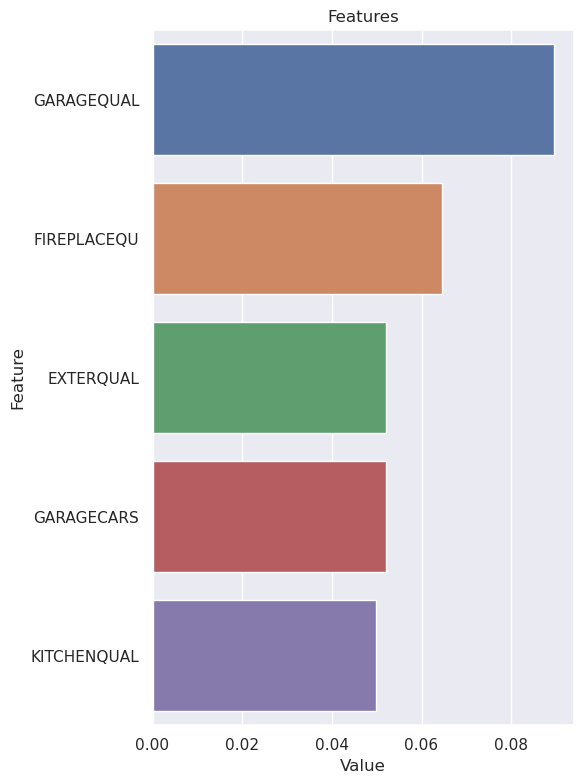

In [42]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(6, 8))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')


plot_importance(xgb, X_train, num=5)

In [43]:


# # Define parameters to optimiser
# param_search = {
#     "max_depth": [8,10,12], 
#     "n_estimators": [800, 1000, 2000, 3000], 
#     "subsample": [0.5, 0.7, 0.6],
#     'learning_rate':[0.01,0.005,0.008]
# #     "min_samples_split": range(2, 20),
# }

# # Create GridSearchCV object
# xgb_search = GridSearchCV(
#     estimator=xgb,
#     cv=10,
#     param_grid=param_search,
#     scoring="neg_root_mean_squared_error",
#     n_jobs=-1,
#     verbose=True,
# ).fit(X_train, y_train)

In [44]:
# # XGBoost HyperParameter Tuning

# from sklearn.model_selection import RandomizedSearchCV

# param_lst = {
#     'n_estimators' : [1000, 2000, 3000, 5000],
#     'max_depth' : [3, 6, 9, 12],
#      'subsample': [0.6, 0.7, 0.8, 0.9]  }

# xgb_reg = RandomizedSearchCV(estimator = xgb, param_distributions = param_lst,
#                               n_iter = 100, scoring = 'neg_root_mean_squared_error',
#                               cv = 5)
       
# xgb_search = xgb_reg.fit(X_train, y_train)

# # XGB with tune hyperparameters
# best_param = xgb_search.best_params_
# xgb = XGBRegressor(**best_param)

# LightGBM

In [45]:
lgbm = LGBMRegressor(max_depth=5,
                    learning_rate=0.01,
                    n_estimators=1000,
                    subsample=0.7,
                    )




lgbm.fit(X_train, y_train)   
preds = lgbm.predict(X_val) 
preds_test_lgbm = lgbm.predict(test)
mae_lgbm = mean_absolute_error(y_val, preds)
rmse_lgbm = np.sqrt(mean_squared_error(y_val, preds))
score_lgbm = lgbm.score(X_val, y_val)
cv_lgbm = mean_cross_val(lgbm, X, y)

print(mae_lgbm)
print(rmse_lgbm)
print(score_lgbm)
print(cv_lgbm)

0.09523761931679563
0.14577155474994508
0.8613458153056617
0.8971710989438811


In [46]:
lgbm.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.01,
 'max_depth': 5,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 1000,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 0.7,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

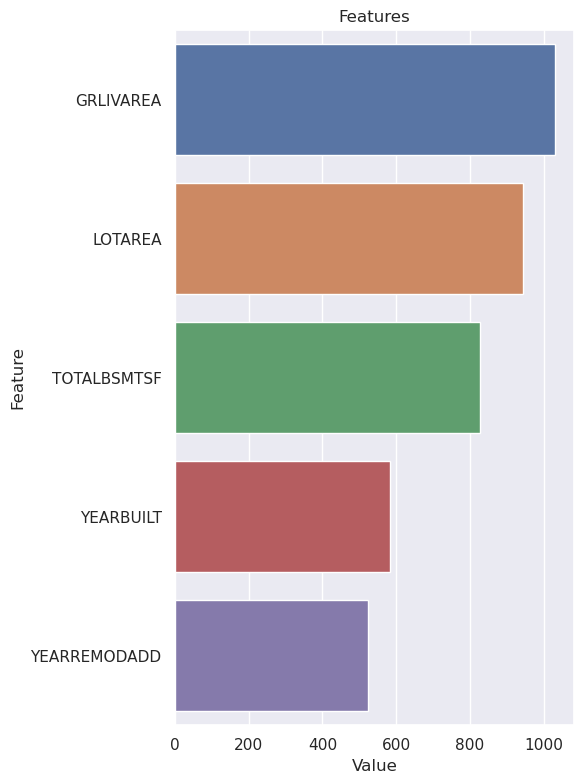

In [47]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(6, 8))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')


plot_importance(lgbm, X_train, num=5)

In [48]:
# # LightBGM Hyperparameter tuning
# param_lst = {
#     'max_depth' : [2, 5, 8, 10],
#     'learning_rate' : [0.001, 0.01, 0.1, 0.2],
#     'n_estimators' : [500, 1000, 1500],
# }

# lightgbm = RandomizedSearchCV(estimator = lgbm, param_distributions = param_lst,
#                               n_iter = 100, scoring = 'neg_root_mean_squared_error',
#                               cv = 5).fit(X_train, y_train)

# # LightBGM with tuned hyperparameters
# # best_param = lightgbm_search.best_params_
# # lgbm = LGBMRegressor(**best_param)

# Catboost

In [49]:
cb = CatBoostRegressor(loss_function='RMSE', logging_level='Silent')


cb.fit(X_train, y_train)   
preds = cb.predict(X_val) 
preds_test_cb = cb.predict(test)
mae_cb = mean_absolute_error(y_val, preds)
rmse_cb = np.sqrt(mean_squared_error(y_val, preds))
score_cb = cb.score(X_val, y_val)
cv_cb = mean_cross_val(cb, X, y)

print(mae_cb)
print(rmse_cb)
print(score_cb)
print(cv_cb)

0.08427053949166154
0.13118280761227916
-665.0774700973518
-547.3457951846049


In [50]:
# #  LightBGM Hyperparameter tuning

# param_lst = {
#     'n_estimators' : [100, 300, 500, 1000, 1300, 1600],
#     'learning_rate' : [0.0001, 0.001, 0.01, 0.1],
#     'l2_leaf_reg' : [0.001, 0.01, 0.1],
#     'random_strength' : [0.25, 0.5 ,1],
#     'max_depth' : [3, 6, 9],
#     'min_child_samples' : [2, 5, 10, 15, 20],
#     'rsm' : [0.5, 0.7, 0.9],
    
# }

# catboost = RandomizedSearchCV(estimator = cb, param_distributions = param_lst,
#                               n_iter = 100, scoring = 'neg_root_mean_squared_error',
#                               cv = 5)

# catboost_search = catboost.fit(X_train, y_train)

# # CatBoost with tuned hyperparams
# best_param = catboost_search.best_params_
# cb = CatBoostRegressor(logging_level='Silent', **best_param)

In [51]:
cb.get_params()

{'loss_function': 'RMSE', 'logging_level': 'Silent'}

# PERFORMANCES

In [52]:
model_performances = pd.DataFrame({
    "Model" : ["XGBoost", "LGBM", "CatBoost"],
    "CV(5)" : [str(cv_xgb)[0:5], str(cv_lgbm)[0:5], str(cv_cb)[0:5]],
    "MAE" : [str(mae_xgb)[0:5], str(mae_lgbm)[0:5], str(mae_cb)[0:5]],
    "RMSE" : [str(rmse_xgb)[0:5], str(rmse_lgbm)[0:5], str(rmse_cb)[0:5]],
    "Score" : [str(score_xgb)[0:5], str(score_lgbm)[0:5], str(score_cb)[0:5]]
})

print("Sorted by Score:")
print(model_performances.sort_values(by="Score", ascending=False))

Sorted by Score:
      Model  CV(5)    MAE   RMSE  Score
0   XGBoost  0.895  0.084  0.140  0.871
1      LGBM  0.897  0.095  0.145  0.861
2  CatBoost  -547.  0.084  0.131  -665.


In [53]:
def blend_models_predict(X, b, c, d):
        return ((b* xgb.predict(X)) + (c * lgbm.predict(X)) + (d * cb.predict(X)))
    

    
subm = np.exp(blend_models_predict(test, 0.4, 0.3, 0.3))
submission = pd.DataFrame({'Id': test.index,
                           'SalePrice': subm})

submission.to_csv("../../kaggle/working/submission.csv", index=False)

<p style="padding:15px;
background-color:#f4ebdc;
margin:0; color:#B3005E; border:2px dotted #C689C6; font-family:Charter; font-weight: bold; font-size:250%; text-align:center; overflow:hidden; font-weight:500">If you like this then please UPVOTE this. Your opinions and suggestions are very important to me...Thanks <img src="https://media.giphy.com/media/WUlplcMpOCEmTGBtBW/giphy.gif" width="100"> <div style="float:center;margin-left:270px;max-width:50%;">

<p style="padding:15px;
background-color:#f4ebdc;
margin:0; color:#B3005E; border:2px dotted #C689C6; font-family:Charter; font-weight: bold; font-size:250%; text-align:center; overflow:hidden; font-weight:500">
FOR MORE:</p> 

[LinkedIn](http://www.linkedin.com/in/serdar-ozturk/)

[GitHub](http://github.com/Serdar-Trk)

[Medium](http:///medium.com/@serdar.f95)


<p style="padding:15px;
background-color:#f4ebdc;
margin:0; color:#B3005E; border:2px dotted #C689C6; font-family:Charter; font-weight: bold; font-size:250%; text-align:center; overflow:hidden; font-weight:500">CREDITS:</p> 

[https://numpy.org/](http://)

[https://seaborn.pydata.org/](http://)

[https://pandas.pydata.org](http://)

[https://pandas.pydata.org/](http://)

[MIUUL](http://learning.miuul.com)